# Customer Loyalty & Behavioral Segmentation Analysis

## 📌 Project Overview
This project analyzes customer transaction behaviors and demographic profiles to identify key differences between loyalty tiers (e.g., Premier vs. Insider users). The goal is to uncover actionable insights for targeted marketing and customer retention strategies.

## 🎯 Key Objectives
* Evaluate the financial capacity and engagement levels of different customer segments.
* Analyze demographics (age, income, assets) and their correlation with ticket purchasing behavior.
* Provide data-driven recommendations to optimize promotional campaigns.

# Section 1 Business Intelligence

## Part 1

## Subsession 1 Data import & Quality assessment

This section focuses on:
1. Data import  
2. Data quality assessment  
3. Data cleaning & transformation  
4. Feature engineering (unk_inc, unk_home, age)  
5. Addressing inconsistencies, inaccuracies, and missing values  

The goal is to prepare clean, reliable data for EDA and machine learning.


### a. Import data

In [122]:
# a.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("InsiderPremier_FinalProject.csv")
df

,ISPREMIER,AGE21PLUSINDICATOR,AGE18TO21INDICATOR,AGE13TO18INDICATOR,GENDERCODE,BIRTHDATE,LOYALTYEMAILOFFEROPTININDICATOR,REWARDSEMAILOPTININDICATOR,REWARDSMOBILEOPTININDICATOR,REWARDSSMSOPTININDICATOR,...,ONLINEFEESWAIVEDAMOUNT,ESTIMATEDINCOMERANGE,ESTIMATEDHOMEMARKETVALUERANGE,CHILDRENPRESENCE,HASFREQUENTVISITTHEATRENUMBER,TICKETQTYSUM,TICKETBALANCEDUESUM,CONCQTYSUM,CONCLOYDISCOUNTAMTSUM,CONCBALANCEDUESUM
0,1,0,0,0,0,1/26/2016,1,1,0,0,...,0.00,8,19,0,0,2,29.58,0,0.00,0.00
1,1,0,0,1,3,1/1/2001,1,1,1,0,...,0.00,8,19,3,1,20,191.90,0,0.00,0.00
2,1,1,0,0,0,11/2/1953,1,1,0,0,...,10.00,8,19,1,0,16,192.84,1,-8.49,0.00
3,0,1,0,0,0,5/18/1962,0,0,0,0,...,0.00,8,19,1,0,0,0.00,1,0.00,0.00
4,1,1,0,0,0,10/2/1965,0,0,0,0,...,5.00,8,19,3,1,10,101.20,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47164,0,1,0,0,3,11/16/1995,1,1,1,0,...,0.00,0,0,3,0,0,0.00,2,0.00,15.47
47165,0,1,0,0,3,11/16/1995,1,1,0,0,...,0.00,0,0,3,0,0,0.00,0,0.00,0.00
47166,0,1,0,0,3,11/16/1995,1,1,1,0,...,0.00,0,0,3,1,1,8.99,0,0.00,0.00
47167,0,1,0,0,3,2/28/2016,1,1,1,0,...,0.00,0,0,3,0,0,0.00,4,0.00,28.97


### b. Data quality assessment report

In [123]:
# Check data types of each column
df.dtypes

ISPREMIER                             int64
AGE21PLUSINDICATOR                    int64
AGE18TO21INDICATOR                    int64
AGE13TO18INDICATOR                    int64
GENDERCODE                            int64
BIRTHDATE                            object
LOYALTYEMAILOFFEROPTININDICATOR       int64
REWARDSEMAILOPTININDICATOR            int64
REWARDSMOBILEOPTININDICATOR           int64
REWARDSSMSOPTININDICATOR              int64
THEATREMOBILEOFFEROPTININDICATOR    float64
THEATRESMSOFFEROPTININDICATOR         int64
LIFETIMEAWARDSEARNEDAMOUNT          float64
LIFETIMESPENDAMOUNT                 float64
ONLINEFEESWAIVEDAMOUNT              float64
ESTIMATEDINCOMERANGE                  int64
ESTIMATEDHOMEMARKETVALUERANGE         int64
CHILDRENPRESENCE                      int64
HASFREQUENTVISITTHEATRENUMBER         int64
TICKETQTYSUM                          int64
TICKETBALANCEDUESUM                 float64
CONCQTYSUM                            int64
CONCLOYDISCOUNTAMTSUM           

In [124]:
# Check for missing values in each column
df.isnull().sum()

ISPREMIER                           0
AGE21PLUSINDICATOR                  0
AGE18TO21INDICATOR                  0
AGE13TO18INDICATOR                  0
GENDERCODE                          0
BIRTHDATE                           0
LOYALTYEMAILOFFEROPTININDICATOR     0
REWARDSEMAILOPTININDICATOR          0
REWARDSMOBILEOPTININDICATOR         0
REWARDSSMSOPTININDICATOR            0
THEATREMOBILEOFFEROPTININDICATOR    3
THEATRESMSOFFEROPTININDICATOR       0
LIFETIMEAWARDSEARNEDAMOUNT          0
LIFETIMESPENDAMOUNT                 0
ONLINEFEESWAIVEDAMOUNT              0
ESTIMATEDINCOMERANGE                0
ESTIMATEDHOMEMARKETVALUERANGE       0
CHILDRENPRESENCE                    0
HASFREQUENTVISITTHEATRENUMBER       0
TICKETQTYSUM                        0
TICKETBALANCEDUESUM                 0
CONCQTYSUM                          0
CONCLOYDISCOUNTAMTSUM               0
CONCBALANCEDUESUM                   0
dtype: int64

In [125]:
# Fill missing values in the column with the mode (most frequent value) of that column
mode_value = df['THEATREMOBILEOFFEROPTININDICATOR'].mode()[0]
df['THEATREMOBILEOFFEROPTININDICATOR'] = df['THEATREMOBILEOFFEROPTININDICATOR'].fillna(mode_value)
df.isnull().sum()

ISPREMIER                           0
AGE21PLUSINDICATOR                  0
AGE18TO21INDICATOR                  0
AGE13TO18INDICATOR                  0
GENDERCODE                          0
BIRTHDATE                           0
LOYALTYEMAILOFFEROPTININDICATOR     0
REWARDSEMAILOPTININDICATOR          0
REWARDSMOBILEOPTININDICATOR         0
REWARDSSMSOPTININDICATOR            0
THEATREMOBILEOFFEROPTININDICATOR    0
THEATRESMSOFFEROPTININDICATOR       0
LIFETIMEAWARDSEARNEDAMOUNT          0
LIFETIMESPENDAMOUNT                 0
ONLINEFEESWAIVEDAMOUNT              0
ESTIMATEDINCOMERANGE                0
ESTIMATEDHOMEMARKETVALUERANGE       0
CHILDRENPRESENCE                    0
HASFREQUENTVISITTHEATRENUMBER       0
TICKETQTYSUM                        0
TICKETBALANCEDUESUM                 0
CONCQTYSUM                          0
CONCLOYDISCOUNTAMTSUM               0
CONCBALANCEDUESUM                   0
dtype: int64

In [126]:
# Summary statistics for numerical columns
df.describe()

,ISPREMIER,AGE21PLUSINDICATOR,AGE18TO21INDICATOR,AGE13TO18INDICATOR,GENDERCODE,LOYALTYEMAILOFFEROPTININDICATOR,REWARDSEMAILOPTININDICATOR,REWARDSMOBILEOPTININDICATOR,REWARDSSMSOPTININDICATOR,THEATREMOBILEOFFEROPTININDICATOR,...,ONLINEFEESWAIVEDAMOUNT,ESTIMATEDINCOMERANGE,ESTIMATEDHOMEMARKETVALUERANGE,CHILDRENPRESENCE,HASFREQUENTVISITTHEATRENUMBER,TICKETQTYSUM,TICKETBALANCEDUESUM,CONCQTYSUM,CONCLOYDISCOUNTAMTSUM,CONCBALANCEDUESUM
count,"47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00",...,"47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00"
mean,0.12,0.89,0.06,0.04,2.46,0.82,0.86,0.50,0.00,0.51,...,4.39,1.05,2.11,2.68,0.34,2.31,23.31,1.97,-0.20,11.33
std,0.32,0.31,0.24,0.19,1.08,0.39,0.35,0.50,0.01,0.50,...,504.10,2.47,4.64,0.81,0.47,6.90,93.36,4.26,1.02,23.85
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-17.68,0.00
25%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,1.00,...,0.00,0.00,0.00,3.00,0.00,1.00,7.98,0.00,0.00,0.00
75%,0.00,1.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,1.00,...,0.00,0.00,0.00,3.00,1.00,3.00,30.78,3.00,0.00,15.19
max,2.00,1.00,1.00,1.00,3.00,5.00,1.00,1.00,1.00,1.00,...,"109,350.00",9.00,19.00,3.00,1.00,"1,251.00","18,382.52",87.00,0.00,517.18


In [127]:
# Convert the BIRTHDATE column to datetime format
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47169 entries, 0 to 47168
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ISPREMIER                         47169 non-null  int64         
 1   AGE21PLUSINDICATOR                47169 non-null  int64         
 2   AGE18TO21INDICATOR                47169 non-null  int64         
 3   AGE13TO18INDICATOR                47169 non-null  int64         
 4   GENDERCODE                        47169 non-null  int64         
 5   BIRTHDATE                         47169 non-null  datetime64[ns]
 6   LOYALTYEMAILOFFEROPTININDICATOR   47169 non-null  int64         
 7   REWARDSEMAILOPTININDICATOR        47169 non-null  int64         
 8   REWARDSMOBILEOPTININDICATOR       47169 non-null  int64         
 9   REWARDSSMSOPTININDICATOR          47169 non-null  int64         
 10  THEATREMOBILEOFFEROPTININDICATOR  47169 non-nu

In [128]:
# Check the unique values in each column
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"Unique values in '{column}': {unique_vals}")

Unique values in 'ISPREMIER': [1 0 2]
Unique values in 'AGE21PLUSINDICATOR': [0 1]
Unique values in 'AGE18TO21INDICATOR': [0 1]
Unique values in 'AGE13TO18INDICATOR': [0 1]
Unique values in 'GENDERCODE': [0 3 1]
Unique values in 'BIRTHDATE': <DatetimeArray>
['2016-01-26 00:00:00', '2001-01-01 00:00:00', '1953-11-02 00:00:00',
 '1962-05-18 00:00:00', '1965-10-02 00:00:00', '1968-08-07 00:00:00',
 '1991-11-13 00:00:00', '1962-08-23 00:00:00', '1967-08-13 00:00:00',
 '1967-12-13 00:00:00',
 ...
 '1995-10-24 00:00:00', '1995-10-29 00:00:00', '1995-11-02 00:00:00',
 '1995-11-05 00:00:00', '1995-11-06 00:00:00', '1995-11-08 00:00:00',
 '1995-11-09 00:00:00', '1995-11-12 00:00:00', '2016-02-28 00:00:00',
 '2016-08-31 00:00:00']
Length: 18096, dtype: datetime64[ns]
Unique values in 'LOYALTYEMAILOFFEROPTININDICATOR': [1 0 5]
Unique values in 'REWARDSEMAILOPTININDICATOR': [1 0]
Unique values in 'REWARDSMOBILEOPTININDICATOR': [0 1]
Unique values in 'REWARDSSMSOPTININDICATOR': [0 1]
Unique values 

## Subsession 2 Data cleaning & Transforming

### a. Rename columns

In [129]:
rename = {
    'AGE21PLUSINDICATOR': 'AGE21PLUS',
    'AGE18TO21INDICATOR': 'AGE18TO21',
    'AGE13TO18INDICATOR': 'AGE13TO18',
    'LOYALTYEMAILOFFEROPTININDICATOR': 'LOYALTY_EMAIL_OFFER',
    'REWARDSEMAILOPTININDICATOR': 'REWARD_EMAIL',
    'REWARDSMOBILEOPTININDICATOR': 'REWARD_MOBILE',
    'REWARDSSMSOPTININDICATOR': 'REWARD_SMS',
    'THEATREMOBILEOFFEROPTININDICATOR': 'THEATR_MOB_OFFER',
    'THEATRESMSOFFEROPTININDICATOR': 'THEATR_SMS_OFFER',
    'LIFETIMEAWARDSEARNEDAMOUNT': 'LIFE_AWARD_AMT',
    'LIFETIMESPENDAMOUNT': 'LIFE_SPEND_AMT',
    'ONLINEFEESWAIVEDAMOUNT': 'OL_FEE_WAIVE_AMT',
    'ESTIMATEDINCOMERANGE': 'EST_INC_RNG',
    'ESTIMATEDHOMEMARKETVALUERANGE': 'EST_HOME_VAL_RNG',
    'CHILDRENPRESENCE': 'CHILD_PRES',
    'HASFREQUENTVISITTHEATRENUMBER': 'FREQ_THEATRE',
    'TICKETQTYSUM': 'TICKET_QTY',
    'TICKETBALANCEDUESUM': 'TICKET_BAL',
    'CONCLOYDISCOUNTAMTSUM': 'CONCLOYDISC',
    'CONCBALANCEDUESUM': 'CONC_BAL'
}

df = df.rename(columns=rename)
df.head()


,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,BIRTHDATE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,...,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL
0,1,0,0,0,0,2016-01-26,1,1,0,0,...,0.00,8,19,0,0,2,29.58,0,0.00,0.00
1,1,0,0,1,3,2001-01-01,1,1,1,0,...,0.00,8,19,3,1,20,191.90,0,0.00,0.00
2,1,1,0,0,0,1953-11-02,1,1,0,0,...,10.00,8,19,1,0,16,192.84,1,-8.49,0.00
3,0,1,0,0,0,1962-05-18,0,0,0,0,...,0.00,8,19,1,0,0,0.00,1,0.00,0.00
4,1,1,0,0,0,1965-10-02,0,0,0,0,...,5.00,8,19,3,1,10,101.20,0,0.00,0.00


### b. Convert the column names to lowercase

In [130]:
df.columns = df.columns.str.lower()
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,...,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal
0,1,0,0,0,0,2016-01-26,1,1,0,0,...,0.00,8,19,0,0,2,29.58,0,0.00,0.00
1,1,0,0,1,3,2001-01-01,1,1,1,0,...,0.00,8,19,3,1,20,191.90,0,0.00,0.00
2,1,1,0,0,0,1953-11-02,1,1,0,0,...,10.00,8,19,1,0,16,192.84,1,-8.49,0.00
3,0,1,0,0,0,1962-05-18,0,0,0,0,...,0.00,8,19,1,0,0,0.00,1,0.00,0.00
4,1,1,0,0,0,1965-10-02,0,0,0,0,...,5.00,8,19,3,1,10,101.20,0,0.00,0.00


### c. Print the column names and the number of unique values in each column

In [131]:
df.nunique().sort_values()

theatr_sms_offer           2
age21plus                  2
age18to21                  2
age13to18                  2
freq_theatre               2
theatr_mob_offer           2
reward_email               2
reward_mobile              2
reward_sms                 2
child_pres                 3
ispremier                  3
gendercode                 3
loyalty_email_offer        3
est_inc_rng               10
est_home_val_rng          20
ticket_qty                56
concqtysum                67
concloydisc              153
life_award_amt           255
ol_fee_waive_amt         275
life_spend_amt          5038
conc_bal                5987
ticket_bal              6965
birthdate              18096
dtype: int64

##### Categorical vs Numerical Variables (Based on Unique Counts)

- Variables with very few unique values (e.g., 0/1 or ≤10) are likely categorical.
- Variables with many unique values are numerical.


### d. Report data types

In [132]:
df.dtypes

ispremier                       int64
age21plus                       int64
age18to21                       int64
age13to18                       int64
gendercode                      int64
birthdate              datetime64[ns]
loyalty_email_offer             int64
reward_email                    int64
reward_mobile                   int64
reward_sms                      int64
theatr_mob_offer              float64
theatr_sms_offer                int64
life_award_amt                float64
life_spend_amt                float64
ol_fee_waive_amt              float64
est_inc_rng                     int64
est_home_val_rng                int64
child_pres                      int64
freq_theatre                    int64
ticket_qty                      int64
ticket_bal                    float64
concqtysum                      int64
concloydisc                   float64
conc_bal                      float64
dtype: object

### e. Find basic statistics

In [133]:
df.describe()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,...,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal
count,"47,169.00","47,169.00","47,169.00","47,169.00","47,169.00",47169,"47,169.00","47,169.00","47,169.00","47,169.00",...,"47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00","47,169.00"
mean,0.12,0.89,0.06,0.04,2.46,1978-08-08 20:16:04.396107648,0.82,0.86,0.50,0.00,...,4.39,1.05,2.11,2.68,0.34,2.31,23.31,1.97,-0.20,11.33
min,0.00,0.00,0.00,0.00,0.00,1925-02-13 00:00:00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-17.68,0.00
25%,0.00,1.00,0.00,0.00,3.00,1969-01-12 00:00:00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,1.00,0.00,0.00,3.00,1980-05-05 00:00:00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,3.00,0.00,1.00,7.98,0.00,0.00,0.00
75%,0.00,1.00,0.00,0.00,3.00,1990-04-01 00:00:00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,3.00,1.00,3.00,30.78,3.00,0.00,15.19
max,2.00,1.00,1.00,1.00,3.00,2016-12-31 00:00:00,5.00,1.00,1.00,1.00,...,"109,350.00",9.00,19.00,3.00,1.00,"1,251.00","18,382.52",87.00,0.00,517.18
std,0.32,0.31,0.24,0.19,1.08,NaN,0.39,0.35,0.50,0.01,...,504.10,2.47,4.64,0.81,0.47,6.90,93.36,4.26,1.02,23.85


### f. Change data types, if necessary  
Already done before


### g. Create unk_inc, unk_home

i. unk_inc: 1 for unknown income, 0 for otherwise  
ii. unk_home: 1 for unknown home value, 0 for otherwise.

In [134]:
df['unk_inc'] = np.where(df['est_inc_rng'] == 0, 1, 0)
df['unk_home'] = np.where(df['est_home_val_rng'] == 0, 1, 0)
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,...,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home
0,1,0,0,0,0,2016-01-26,1,1,0,0,...,19,0,0,2,29.58,0,0.00,0.00,0,0
1,1,0,0,1,3,2001-01-01,1,1,1,0,...,19,3,1,20,191.90,0,0.00,0.00,0,0
2,1,1,0,0,0,1953-11-02,1,1,0,0,...,19,1,0,16,192.84,1,-8.49,0.00,0,0
3,0,1,0,0,0,1962-05-18,0,0,0,0,...,19,1,0,0,0.00,1,0.00,0.00,0,0
4,1,1,0,0,0,1965-10-02,0,0,0,0,...,19,3,1,10,101.20,0,0.00,0.00,0,0


### h. Create a new column ‘age’ from ‘birthdate’ and then remove ‘birthdate’

In [135]:
from datetime import datetime

# Calculate age
current_date = datetime.now()
df['age'] = (current_date - df['birthdate']).dt.days // 365
df = df.drop(columns=['birthdate'])
df

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,1,0,0,0,0,1,1,0,0,0.00,...,0,0,2,29.58,0,0.00,0.00,0,0,9
1,1,0,0,1,3,1,1,1,0,1.00,...,3,1,20,191.90,0,0.00,0.00,0,0,24
2,1,1,0,0,0,1,1,0,0,0.00,...,1,0,16,192.84,1,-8.49,0.00,0,0,72
3,0,1,0,0,0,0,0,0,0,0.00,...,1,0,0,0.00,1,0.00,0.00,0,0,63
4,1,1,0,0,0,0,0,0,0,0.00,...,3,1,10,101.20,0,0.00,0.00,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47164,0,1,0,0,3,1,1,1,0,1.00,...,3,0,0,0.00,2,0.00,15.47,1,1,30
47165,0,1,0,0,3,1,1,0,0,0.00,...,3,0,0,0.00,0,0.00,0.00,1,1,30
47166,0,1,0,0,3,1,1,1,0,1.00,...,3,1,1,8.99,0,0.00,0.00,1,1,30
47167,0,1,0,0,3,1,1,1,0,1.00,...,3,0,0,0.00,4,0.00,28.97,1,1,9


### i. Discuss any other data quality issues

In [136]:
# Checking for unrealistic ages:
df[(df['age'] < 0) | (df['age'] > 100)]

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age


In [137]:
# Check for unique values in all categorical fields
print(df['gendercode'].unique())
print(df['est_inc_rng'].unique())
print(df['est_home_val_rng'].unique())


[0 3 1]
[8 2 3 4 5 6 7 9 1 0]
[19  5  1  6  7  8  9 10 11  2 12 13 14 15 16 17  3 18  4  0]


<Axes: >

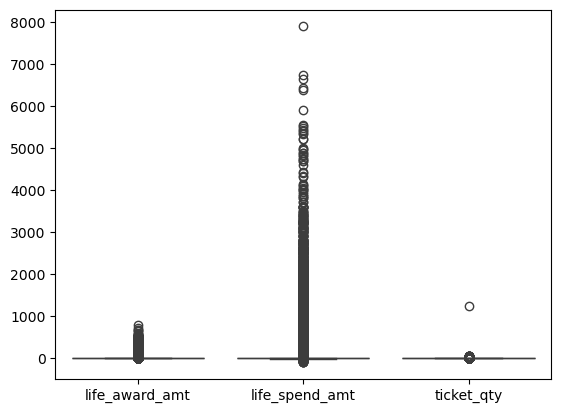

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display a boxplot to check for outliers
sns.boxplot(data=df[['life_award_amt', 'life_spend_amt', 'ticket_qty']])


In [139]:
# Check for logical errors in age: Look for contradictory situations
invalid_logic = df[(df['age21plus'] == 1) & (df['age18to21'] == 1) & (df['age13to18'] == 1)]
print(invalid_logic)


       ispremier  age21plus  age18to21  age13to18  gendercode  \
2693           0          1          1          1           1   
14854          1          1          1          1           0   
14855          0          1          1          1           3   
14856          1          1          1          1           3   
14857          0          1          1          1           3   

       loyalty_email_offer  reward_email  reward_mobile  reward_sms  \
2693                     1             1              1           0   
14854                    1             1              1           0   
14855                    1             1              0           0   
14856                    1             1              0           0   
14857                    1             1              1           0   

       theatr_mob_offer  ...  child_pres  freq_theatre  ticket_qty  \
2693               1.00  ...           3             0           0   
14854              1.00  ...           3  

In [140]:
# Set age21plus, age18to21, and age13to18 based on age
df.loc[df.index.isin([2693, 14854, 14855, 14856]), ['age18to21', 'age13to18']] = 0
# Check if there are still any logical errors where all three conditions are true at the same time
print(df.loc[df.index.isin([2693, 14854, 14855, 14856]), ['age18to21', 'age13to18']])


       age18to21  age13to18
2693           0          0
14854          0          0
14855          0          0
14856          0          0


In [141]:

df.loc[df.index.isin([14857]), ['age18to21', 'age13to18','age21plus']] = 0

print(df.loc[df.index.isin([14857]), ['age18to21', 'age13to18','age21plus']])


       age18to21  age13to18  age21plus
14857          0          0          0


In [142]:
# Check for unique values in the `ispremier` field
df['ispremier'].unique()

array([1, 0, 2])

In [143]:
# Convert rows where the value in the `ispremier` field is 2 to 0.
df['ispremier'] = df['ispremier'].replace(2, 0)

In [144]:
# Replace the value 5 with 0 in the 'loyalty_email_offer' column
df['loyalty_email_offer'] = df['loyalty_email_offer'].replace(5, 0)

In [145]:
df.nunique().sort_values()

ispremier                 2
unk_home                  2
unk_inc                   2
theatr_sms_offer          2
freq_theatre              2
reward_sms                2
reward_mobile             2
theatr_mob_offer          2
loyalty_email_offer       2
age13to18                 2
age18to21                 2
age21plus                 2
reward_email              2
gendercode                3
child_pres                3
est_inc_rng              10
est_home_val_rng         20
ticket_qty               56
concqtysum               67
age                      84
concloydisc             153
life_award_amt          255
ol_fee_waive_amt        275
life_spend_amt         5038
conc_bal               5987
ticket_bal             6965
dtype: int64

### j&k. Addressing Inconsistencies and Inaccuracies

- Ensure binary indicators contain only 0/1.
- Check for unique values in all categorical fields.
- Ensure that age21plus, age18to21, and age13to18 are logically consistent.
- Check the unique values in each column.
- Convert rows where the value in the `ispremier` field is 2 to 0.
- Replace the value 5 with 0 in the 'loyalty_email_offer' column

### l. Address missing values

- Replace invalid values with mode_value.
- Many missing values are structural (unknown income, unknown home value).  
- Other missing values come from cleaning (unrealistic ages).  
- For BI analysis, we keep missing as-is unless necessary.  
- For ML later, preprocessing will handle imputation.


## Part 2

## Subsession 1 BI: Data Visualization & EDA

### a. Overview of the  problem

**1. Who are the customers likely to convert to Premier?**

Customers most likely to convert to Premier are those who:

- **Purchase more tickets** (`ticket_qty` with a correlation of 0.26), indicating they are frequent buyers and may value the perks of the Premier program.
- **Have higher accumulated balances or quantities** (`concqtysum` with a correlation of 0.34 and `conc_bal` with a correlation of 0.35), suggesting a higher level of engagement or loyalty.
- **Spend more over their lifetime** (`life_spend_amt` with a correlation of 0.22) and have accumulated significant rewards or awards (`life_award_amt` with a correlation of 0.22), showing they are long-term, committed customers.
- **May have a higher estimated income range** (`est_inc_rng` with a correlation of 0.13), suggesting that wealthier customers might be more likely to subscribe to a premium service.

**2. Who are the customers utilizing Premier?**

Customers already utilizing Premier tend to:

- **Purchase more tickets** (`ticket_qty` with a correlation of 0.26), which likely means they are already frequent enough to be enrolled in the Premier program.
- **Have larger balances and accumulated quantities** (`concqtysum` and `conc_bal`), indicating they are more invested in the system, potentially due to loyalty or reward programs.
- **Exhibit higher lifetime spending** (`life_spend_amt` with a correlation of 0.22), pointing to a history of significant financial engagement with the service.

**3. Who are the customers utilizing Insider?**

While there’s no direct correlation for an "Insider" group, we can infer:

- Customers who engage with loyalty programs are likely to use Insider benefits. For example, those who opt into loyalty email offers (`loyalty_email_offer` with a correlation of 0.02) or interact with reward emails and mobile offers (`reward_email` and `reward_mobile` with correlations of 0.02 and 0.10, respectively), even though these correlations are weak, still show engagement with offers that might indicate Insider usage.


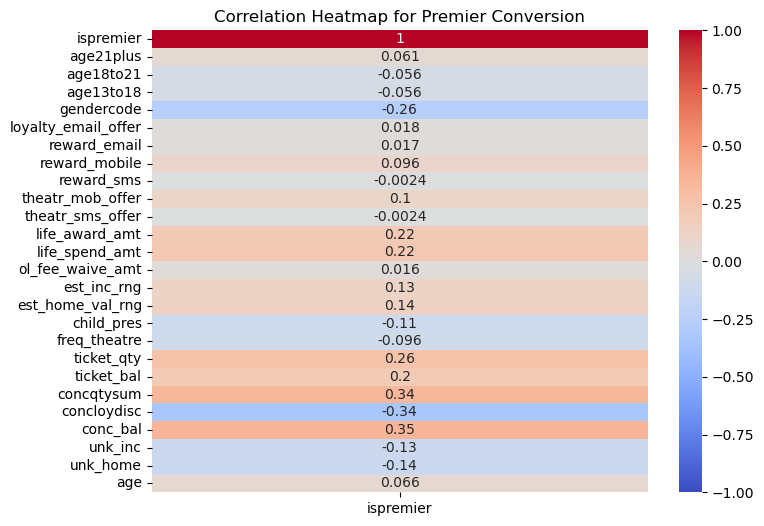

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap with a focus on 'ispremier'
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['ispremier']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Premier Conversion")
plt.show()


### b. Business Intelligence (Pivot + Viz)

##### B1. Pivot Table: Group by ISPREMIER

In [147]:
# Grouping by 'ispremier' (Premier vs Non-Premier) to analyze different behaviors
pivot_ispremier = df.groupby('ispremier').agg(
    # Counting the number of customers in each group (Premier vs Non-Premier)
    count=('ispremier', 'count'),
    
    # Calculating the average and median age for each group
    avg_age=('age', 'mean'),
    median_age=('age', 'median'),
    
    # Analyzing ticket balances and quantities
    avg_ticket_bal=('ticket_bal', 'mean'),
    median_ticket_bal=('ticket_bal', 'median'),
    avg_ticket_qty=('ticket_qty', 'mean'),
    
    # Analyzing lifetime award and spending amounts
    avg_life_award=('life_award_amt', 'mean'),
    avg_life_spend=('life_spend_amt', 'mean'),
    
    # Calculating discounts and balances related to loyalty program
    avg_concloydisc=('concloydisc', 'mean'),
    avg_conc_bal=('conc_bal', 'mean')
).round(2)  # Round all results to 2 decimal places for clarity

# Display the pivot table
pivot_ispremier


,count,avg_age,median_age,avg_ticket_bal,median_ticket_bal,avg_ticket_qty,avg_life_award,avg_life_spend,avg_concloydisc,avg_conc_bal
ispremier,,,,,,,,,,
0,41727,46.50,45.00,16.50,0.00,1.66,2.47,28.41,-0.07,8.34
1,5442,49.54,49.00,75.54,54.52,7.32,23.40,231.80,-1.14,34.21


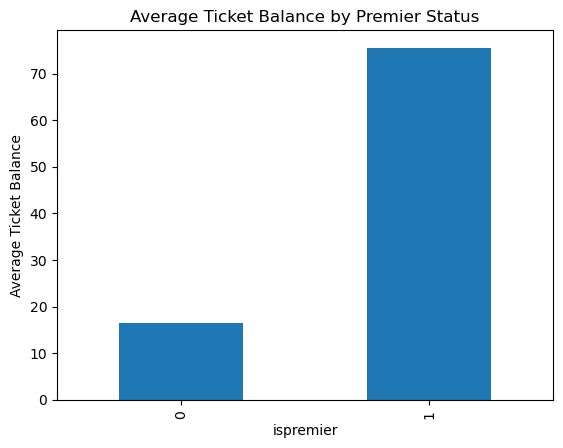

In [148]:
# Plotting the average ticket balance for Premier vs Non-Premier customers
pivot_ispremier['avg_ticket_bal'].plot(kind='bar', title='Average Ticket Balance by Premier Status')
plt.ylabel('Average Ticket Balance')
plt.show()

##### B2. Pivot Table: Group by ISPREMIER × UNK_HOME

In [149]:
# Crosstab: helps check if unknown home value impacts Premier likelihood
ct_ispremier_unkhome = pd.crosstab(
    df['ispremier'],
    df['unk_home'],
    normalize='index'   # row percentage
) * 100

ct_ispremier_unkhome.round(2)


unk_home,0,1
ispremier,,
0,19.39,80.61
1,36.82,63.18


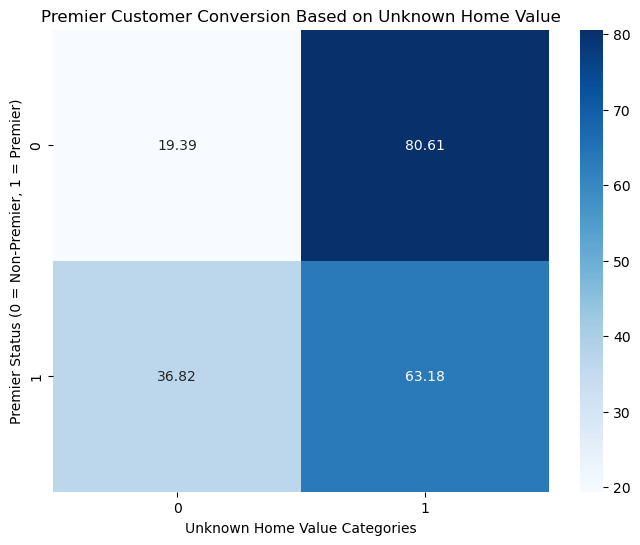

In [150]:
# Convert crosstab to DataFrame for visualization
ct_ispremier_unkhome_df = ct_ispremier_unkhome.reset_index()

# Plotting a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(ct_ispremier_unkhome, annot=True, cmap="Blues", fmt=".2f")
plt.title("Premier Customer Conversion Based on Unknown Home Value")
plt.ylabel("Premier Status (0 = Non-Premier, 1 = Premier)")
plt.xlabel("Unknown Home Value Categories")
plt.show()

##### B3. Visualization: AGE distribution vs ISPREMIER

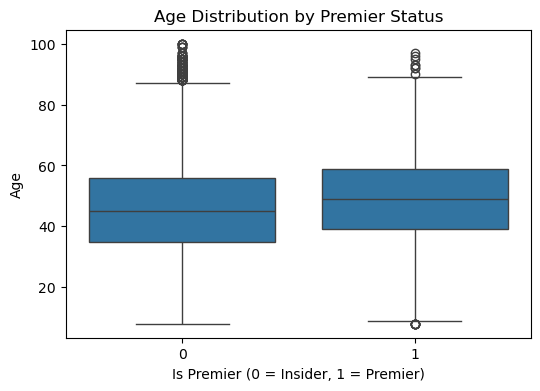

In [151]:
plt.figure(figsize=(6,4))
sns.boxplot(x='ispremier', y='age', data=df)
plt.title("Age Distribution by Premier Status")
plt.xlabel("Is Premier (0 = Insider, 1 = Premier)")
plt.ylabel("Age");


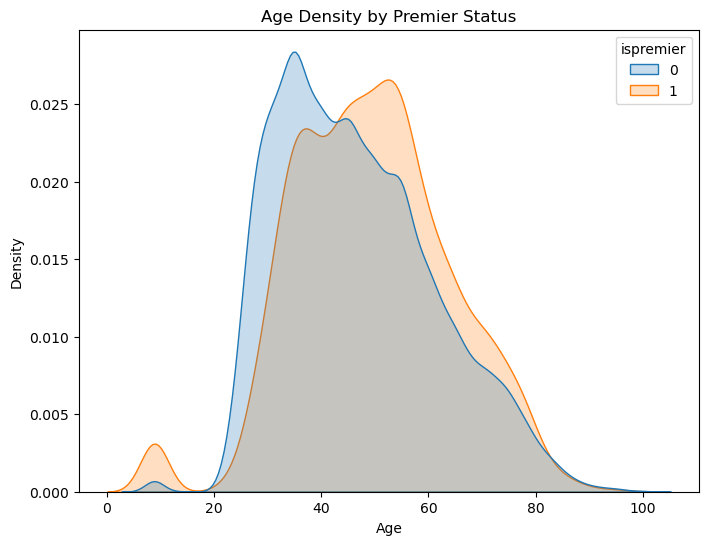

In [152]:
# KDE distribution to see shape difference
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='age', hue='ispremier', fill=True, common_norm=False)
plt.title("Age Density by Premier Status")
plt.xlabel("Age");

##### B4. Online Fees Waived vs Estimated Income Range

In [153]:
# Group income → online fee waived summary
fee_by_income = df.groupby('est_inc_rng')['ol_fee_waive_amt'].agg(
    mean='mean',
    median='median',
    count='count'
).reset_index()

fee_by_income



,est_inc_rng,mean,median,count
0,0,4.13,0.00,39158
1,1,3.79,0.00,288
2,2,2.57,0.00,225
3,3,3.07,0.00,435
4,4,6.50,0.00,662
5,5,2.86,0.00,809
6,6,5.52,0.00,2090
7,7,6.16,0.00,1373
8,8,5.69,0.00,669
9,9,8.36,0.00,1460


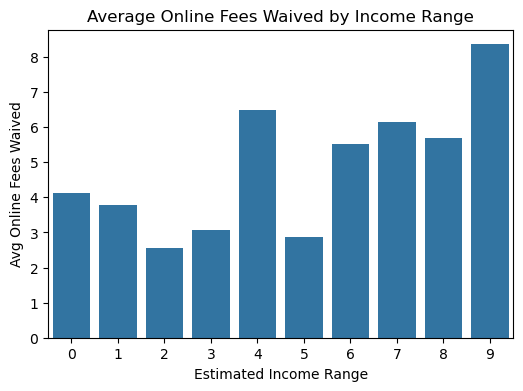

In [154]:
plt.figure(figsize=(6,4))
sns.barplot(data=fee_by_income, x='est_inc_rng', y='mean')
plt.title("Average Online Fees Waived by Income Range")
plt.xlabel("Estimated Income Range")
plt.ylabel("Avg Online Fees Waived");

##### B5. Lifetime Awards vs Estimated Income Range

In [155]:
life_by_income = df.groupby('est_inc_rng')['life_award_amt'].agg(
    mean='mean',
    median='median',
    count='count'
).reset_index()

life_by_income


,est_inc_rng,mean,median,count
0,0,1.36,0.00,39158
1,1,13.29,0.00,288
2,2,14.95,0.00,225
3,3,12.58,0.00,435
4,4,17.37,0.00,662
5,5,17.68,0.00,809
6,6,19.41,0.00,2090
7,7,23.93,0.00,1373
8,8,26.34,0.00,669
9,9,32.61,0.00,1460


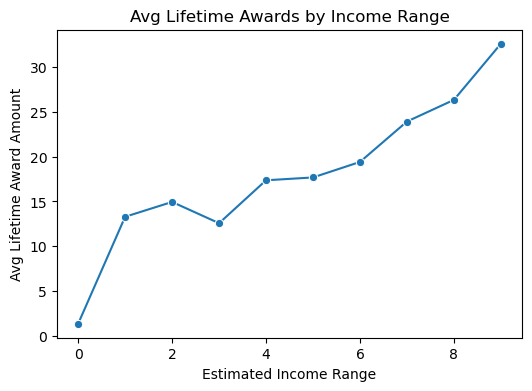

In [156]:
plt.figure(figsize=(6,4))
sns.lineplot(data=life_by_income, x='est_inc_rng', y='mean', marker='o')
plt.title("Avg Lifetime Awards by Income Range")
plt.xlabel("Estimated Income Range")
plt.ylabel("Avg Lifetime Award Amount");


##### B6. % Membership by Opt-in Variables

In [157]:
# Calculate the proportion of Premier members within each group
def membership_pct_by(group_column):
    # Calculate a cross-tabulation to show the proportion of Premier members (ispremier) in each group
    group_premier_table = pd.crosstab(df[group_column], df['ispremier'], normalize='index') * 100
    
    # Round the results to two decimal places
    return group_premier_table.round(2)


In [158]:
#Loyalty Email Offer Opt-in
pct_loyalty_email = membership_pct_by('loyalty_email_offer')
pct_loyalty_email


ispremier,0,1
loyalty_email_offer,,
0,89.66,10.34
1,88.19,11.81


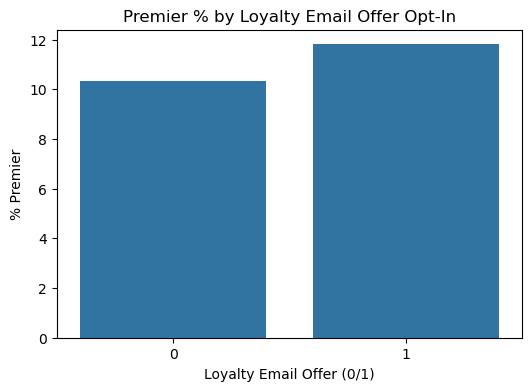

In [159]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=pct_loyalty_email.index.astype(str),
    y=pct_loyalty_email[1]  # Premier %
)
plt.title("Premier % by Loyalty Email Offer Opt-In")
plt.xlabel("Loyalty Email Offer (0/1)")
plt.ylabel("% Premier");

In [160]:
#Reward Email Opt-in
pct_reward_email = membership_pct_by('reward_email')
pct_reward_email

ispremier,0,1
reward_email,,
0,89.80,10.20
1,88.24,11.76


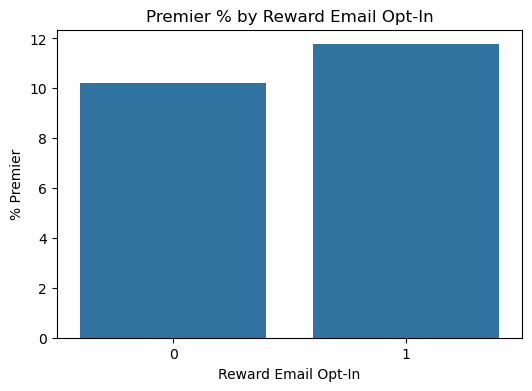

In [161]:
plt.figure(figsize=(6,4))
sns.barplot(x=pct_reward_email.index.astype(str), y=pct_reward_email[1])
plt.title("Premier % by Reward Email Opt-In")
plt.xlabel("Reward Email Opt-In")
plt.ylabel("% Premier");


In [162]:
#Reward Mobile Opt-in
pct_reward_mobile = membership_pct_by('reward_mobile')
pct_reward_mobile

ispremier,0,1
reward_mobile,,
0,91.56,8.44
1,85.41,14.59


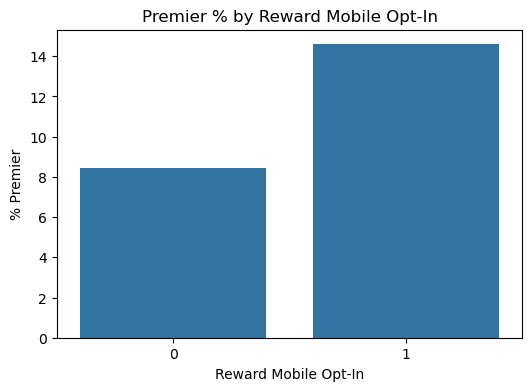

In [163]:
plt.figure(figsize=(6,4))
sns.barplot(x=pct_reward_mobile.index.astype(str), y=pct_reward_mobile[1])
plt.title("Premier % by Reward Mobile Opt-In")
plt.xlabel("Reward Mobile Opt-In")
plt.ylabel("% Premier");


In [164]:
#Reward SMS Opt-in
pct_reward_sms = membership_pct_by('reward_sms')
pct_reward_sms

ispremier,0,1
reward_sms,,
0,88.46,11.54
1,100.00,0.00


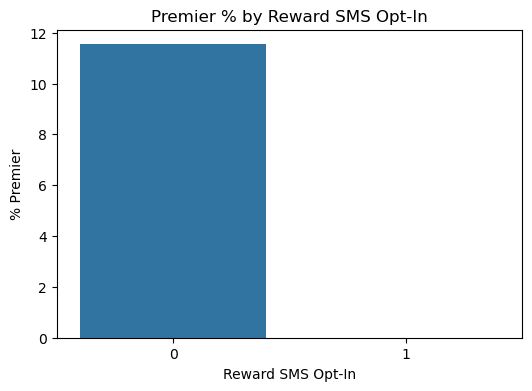

In [165]:
plt.figure(figsize=(6,4))
sns.barplot(x=pct_reward_sms.index.astype(str), y=pct_reward_sms[1])
plt.title("Premier % by Reward SMS Opt-In")
plt.xlabel("Reward SMS Opt-In")
plt.ylabel("% Premier");

ispremier,0,1
gendercode,,
0,74.33,25.67
1,65.83,34.17
3,92.97,7.03


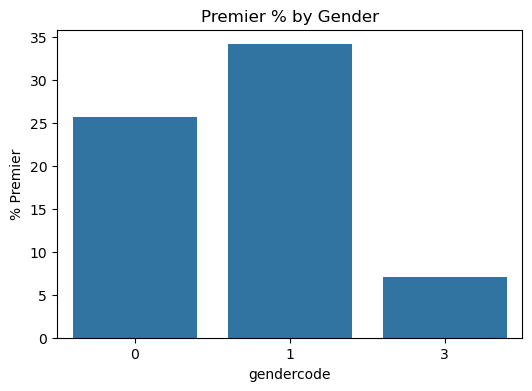

In [166]:
#Gender
pct_gender = membership_pct_by('gendercode')
display(pct_gender)

plt.figure(figsize=(6,4))
sns.barplot(x=pct_gender.index.astype(str), y=pct_gender[1])
plt.title("Premier % by Gender")
plt.ylabel("% Premier")
plt.show()


In [167]:
#Estimated Income Range (% Premier by Income)
pct_income = pd.crosstab(df['est_inc_rng'], df['ispremier'], normalize='index') * 100
pct_income = pct_income.round(2)
pct_income

ispremier,0,1
est_inc_rng,,
0,90.36,9.64
1,86.81,13.19
2,79.11,20.89
3,82.30,17.70
4,79.91,20.09
5,78.99,21.01
6,80.67,19.33
7,78.44,21.56
8,75.19,24.81


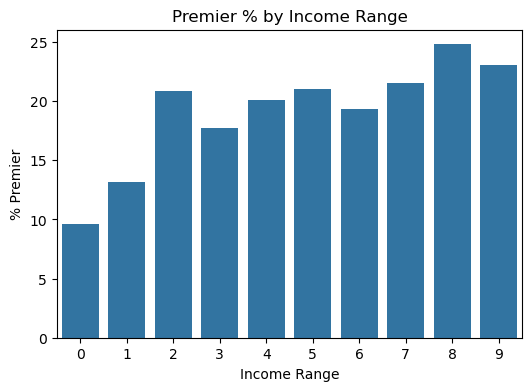

In [168]:
plt.figure(figsize=(6,4))
sns.barplot(x=pct_income.index.astype(str), y=pct_income[1])
plt.title("Premier % by Income Range")
plt.xlabel("Income Range")
plt.ylabel("% Premier");


##### B7. Concession Loyalty Discount vs Concession Balance

In [169]:
# Premier vs non-Premier average concession stats
concession_by_prem = df.groupby('ispremier').agg(
    avg_disc=('concloydisc','mean'),
    avg_bal=('conc_bal','mean'),
    count=('concloydisc','count')
).round(2)

concession_by_prem


,avg_disc,avg_bal,count
ispremier,,,
0,-0.07,8.34,41727
1,-1.14,34.21,5442


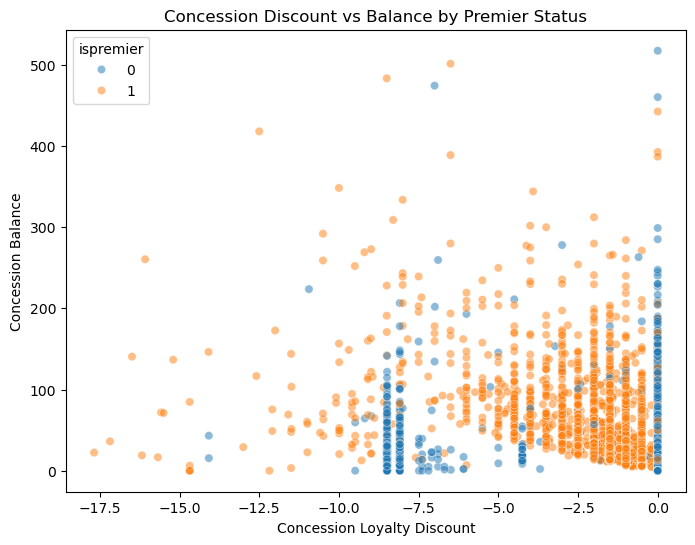

In [170]:
# Scatter: concloydisc vs conc_bal colored by Premier
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='concloydisc',
    y='conc_bal',
    hue='ispremier',
    alpha=0.5
)
plt.title("Concession Discount vs Balance by Premier Status")
plt.xlabel("Concession Loyalty Discount")
plt.ylabel("Concession Balance");


##### B8. Ticket Balance vs Ticket Quantity

In [171]:
ticket_by_prem = df.groupby('ispremier').agg(
    avg_ticket_qty=('ticket_qty','mean'),
    avg_ticket_bal=('ticket_bal','mean')
).round(2)

ticket_by_prem


,avg_ticket_qty,avg_ticket_bal
ispremier,,
0,1.66,16.50
1,7.32,75.54


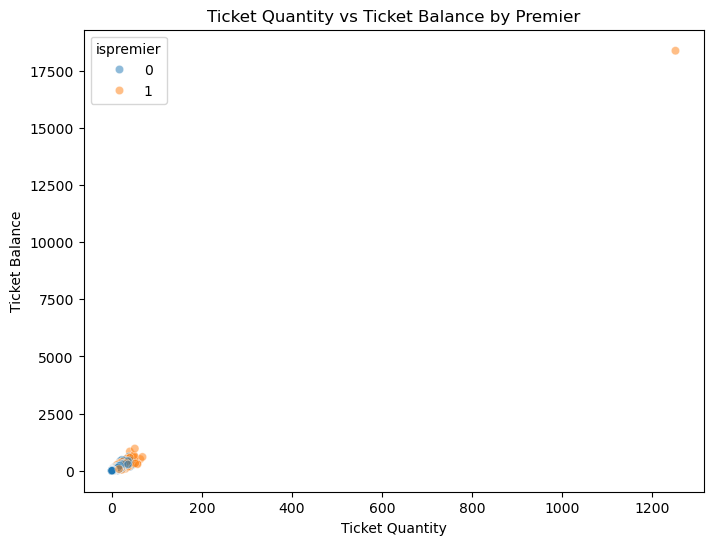

In [172]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='ticket_qty',
    y='ticket_bal',
    hue='ispremier',
    alpha=0.5
)
plt.title("Ticket Quantity vs Ticket Balance by Premier")
plt.xlabel("Ticket Quantity")
plt.ylabel("Ticket Balance");


### c. Correlation Analysis

##### C1. Numeric Correlation Matrix

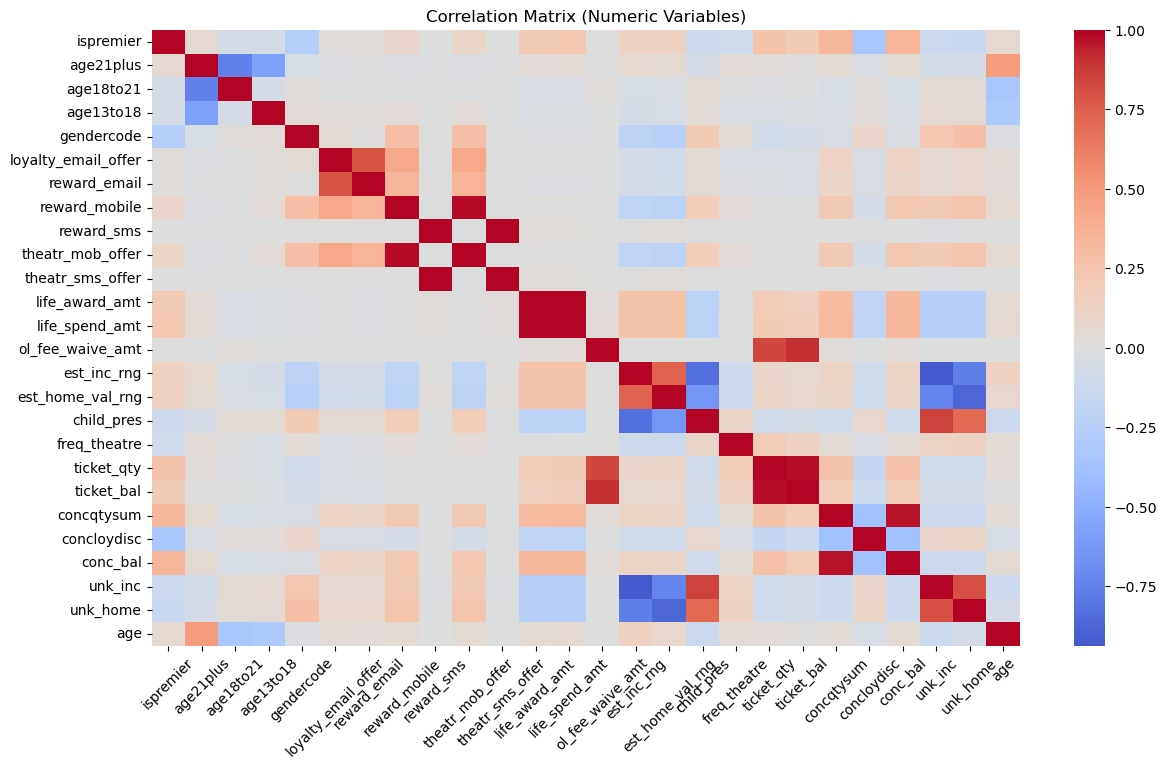

In [173]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', center=0)
plt.xticks(rotation=45)
plt.title("Correlation Matrix (Numeric Variables)");


##### C2. Correlation with Target (ispremier)

In [174]:
corr_matrix['ispremier'].sort_values(ascending=False)

ispremier              1.00
conc_bal               0.35
concqtysum             0.34
ticket_qty             0.26
life_spend_amt         0.22
life_award_amt         0.22
ticket_bal             0.20
est_home_val_rng       0.14
est_inc_rng            0.13
theatr_mob_offer       0.10
reward_mobile          0.10
age                    0.07
age21plus              0.06
loyalty_email_offer    0.02
reward_email           0.02
ol_fee_waive_amt       0.02
theatr_sms_offer      -0.00
reward_sms            -0.00
age13to18             -0.06
age18to21             -0.06
freq_theatre          -0.10
child_pres            -0.11
unk_inc               -0.13
unk_home              -0.14
gendercode            -0.26
concloydisc           -0.34
Name: ispremier, dtype: float64

##### C3. Calculate and display correlation, excluding autocorrelation

In [175]:
correlation_matrix_sorted = df.corr().abs().unstack().sort_values(ascending=False)

correlation_matrix_sorted = correlation_matrix_sorted[correlation_matrix_sorted < 1]

print(correlation_matrix_sorted)

life_award_amt    life_spend_amt     1.00
life_spend_amt    life_award_amt     1.00
theatr_mob_offer  reward_mobile      0.98
reward_mobile     theatr_mob_offer   0.98
ticket_bal        ticket_qty         0.97
                                     ... 
reward_mobile     theatr_sms_offer   0.00
reward_sms        ol_fee_waive_amt   0.00
ol_fee_waive_amt  reward_sms         0.00
theatr_sms_offer  ol_fee_waive_amt   0.00
ol_fee_waive_amt  theatr_sms_offer   0.00
Length: 648, dtype: float64


## Subsession 2 Storytelling

### 1. Who are the customers that are likely to convert to Premier?

Customers likely to convert to Premier typically have the following characteristics:

- **Higher Spending and Points**: Customers with higher `life_award_amt` and `life_spend_amt` tend to be more likely to convert to Premier (correlations of 0.22).
  
- **Higher Ticket Quantity and Balance**: Those with higher `ticket_qty` and `ticket_bal` also show a strong likelihood of converting to Premier (correlations of 0.26 and 0.20, respectively).
  
- **Higher Income and Home Value**: Customers with higher `est_inc_rng` and `est_home_val_rng` (correlations of 0.13 and 0.14) are more likely to engage with premium programs.
  
- **Loyalty Program Engagement**: Customers who engage with loyalty programs (`loyalty_email_offer`, `reward_email`, `reward_mobile`) are more likely to convert to Premier. For example, the correlation between `reward_mobile` and Premier conversion is 0.10.


### 2. Who are the customers that utilize Premier?

Customers using Premier typically show:

- **High Ticket Quantity and Balance**: Premier users tend to purchase more tickets (`avg_ticket_qty` of 7.32 vs. 1.66) and have higher balances (`avg_ticket_bal` of 75.54 vs. 16.50).
  
- **Higher Spending and Points**: Premier members spend significantly more (`avg_life_award` of 23.40 vs. 2.47, `avg_life_spend` of 231.80 vs. 28.41).
  
- **Higher Income and Assets**: Premier customers often have higher balances (`avg_conc_bal` of 34.21), indicating greater financial resources.


### 3. Who are the customers that utilize Insider?

Customers using Insider, likely part of a loyalty or premium service, typically have:

- **Loyalty Program Engagement**: Customers who participate in loyalty programs (`loyalty_email_offer`, `reward_email`) are more likely to use Insider services.
  
- **Higher Age**: Users of high-end services like Insider tend to be older (`avg_age` of 49.5 vs. 46.47), suggesting that older customers may be more inclined to use premium services.

- **Higher Income and Home Value**: Customers with higher financial resources, as seen in `avg_conc_bal` and `avg_concloydisc`, are more likely to engage with Insider.



# Section 2 Machine Learning

## Part 1

## Subsession 1 Classification

### Machine learning models

##### Data Preprocessing for ML

In [176]:
df.dtypes

ispremier                int64
age21plus                int64
age18to21                int64
age13to18                int64
gendercode               int64
loyalty_email_offer      int64
reward_email             int64
reward_mobile            int64
reward_sms               int64
theatr_mob_offer       float64
theatr_sms_offer         int64
life_award_amt         float64
life_spend_amt         float64
ol_fee_waive_amt       float64
est_inc_rng              int64
est_home_val_rng         int64
child_pres               int64
freq_theatre             int64
ticket_qty               int64
ticket_bal             float64
concqtysum               int64
concloydisc            float64
conc_bal               float64
unk_inc                  int64
unk_home                 int64
age                      int64
dtype: object

In [177]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [178]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore") 

pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})

In [179]:
# declare X variables and y variable

y = df['ispremier']
X = df.drop(['ispremier'], axis=1)

In [180]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)

(33018, 25) (33018,)


In [181]:
# This is a safer approach
num_cols = [
    'age', 'life_award_amt', 'life_spend_amt', 'ol_fee_waive_amt',
    'ticket_qty', 'ticket_bal', 'concqtysum', 'concloydisc', 'conc_bal'
]

cat_cols = [
    'gendercode', 'loyalty_email_offer', 'reward_email',
    'reward_mobile', 'reward_sms', 'theatr_sms_offer',
    'est_inc_rng', 'est_home_val_rng'
]

In [182]:
# Numeric transformer: Standardize numerical features (mean=0, std=1)
num_transformer = StandardScaler()
# Categorical transformer (OneHotEncoder for one-hot encoding)
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Preprocessor: Apply numerical and categorical transformations to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],

)

# Create a pipeline that first applies preprocessing and then trains a classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
])


#### a. Full-grown decision tree & simple decision tree:

In [183]:
# Train a decision tree model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'life_award_amt',
                                                   'life_spend_amt',
                                                   'ol_fee_waive_amt',
                                                   'ticket_qty', 'ticket_bal',
                                                   'concqtysum', 'concloydisc',
                                                   'conc_bal']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gendercode',
                                                   'loyalty_email_offer',
                                                   'reward_email',
                                                   'reward_mobile',
                                                   'reward_sms',
                                                   'theatr_sms_offer',
                                                   'est_inc_rng',
                                                   'est_home_val_rng'])])),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [184]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

# y-test is the actual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are the same, we can say your model is accurate.

0.9291922832308671
--------------------------------------------------------
[[12034   499]
 [  503  1115]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12533
           1       0.69      0.69      0.69      1618

    accuracy                           0.93     14151
   macro avg       0.83      0.82      0.83     14151
weighted avg       0.93      0.93      0.93     14151

--------------------------------------------------------
0.8246537423032614


In [185]:
#simpler decision tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dt_simple = DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.05) 
dt_simple.fit(X_train, y_train)

predicted_y = dt_simple.predict(X_test)

In [186]:
# Find out the performance of this model & interpret the results
print(metrics.accuracy_score(y_test, predicted_y))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, predicted_y)) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, predicted_y))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, predicted_y))

0.9340682637269451
--------------------------------------------------------
[[12385   148]
 [  785   833]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12533
           1       0.85      0.51      0.64      1618

    accuracy                           0.93     14151
   macro avg       0.89      0.75      0.80     14151
weighted avg       0.93      0.93      0.93     14151

--------------------------------------------------------
0.7515121513074458


##### i) Visualize the simple decision tree

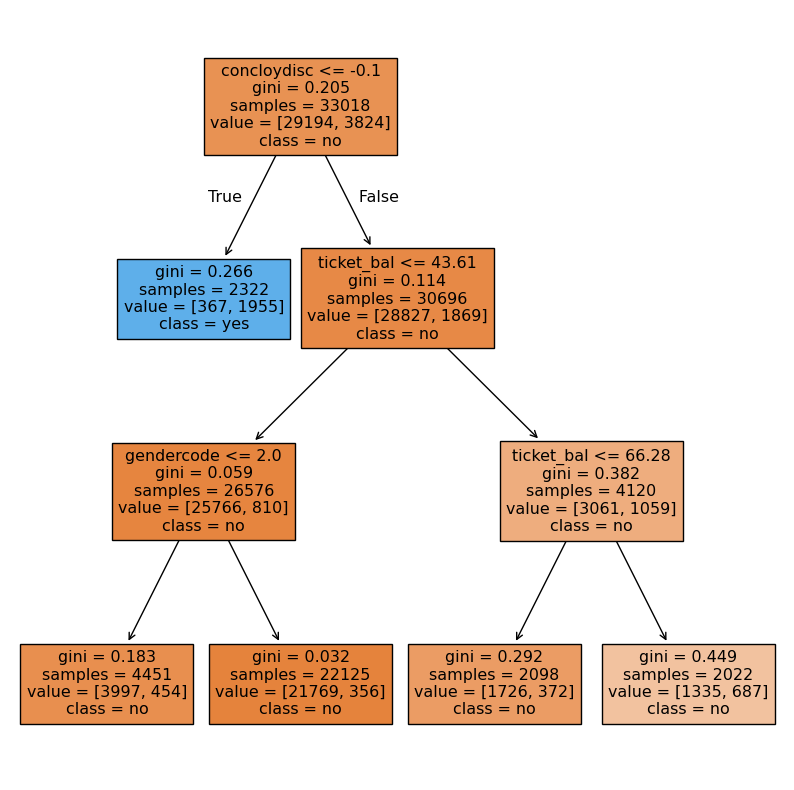

In [187]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt_simple, 
                feature_names = X.columns, 
                class_names=['no','yes'],    # no: healthy, yes: 2nd heartattack
                filled = True)
plt.show();

##### ii) Report the most important variables from the simple decision tree

In [188]:
text_representation = tree.export_text(dt_simple, 
                                       feature_names=(list(X.columns)))
print(text_representation)  

|--- concloydisc <= -0.10
|   |--- class: 1
|--- concloydisc >  -0.10
|   |--- ticket_bal <= 43.61
|   |   |--- gendercode <= 2.00
|   |   |   |--- class: 0
|   |   |--- gendercode >  2.00
|   |   |   |--- class: 0
|   |--- ticket_bal >  43.61
|   |   |--- ticket_bal <= 66.28
|   |   |   |--- class: 0
|   |   |--- ticket_bal >  66.28
|   |   |   |--- class: 0



##### iii) Key Decision Rules

- **concloydisc <= -0.10 → Premier**  
  Customers with very low or negative discounts are mostly Premier members.

- **concloydisc > -0.10 and ticket_bal <= 43.61 → Not Premier**  
  Customers with normal discounts and low ticket balances are unlikely to be Premier.

- **ticket_bal > 43.61 → Mostly Not Premier**  
  Customers with medium or slightly high ticket balances are still likely not Premier; only very high ticket balances increase the chance of being Premier.


#### b. Logistic regression

In [189]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [190]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.925941629566815
--------------------------------------------------------
[[12263   270]
 [  778   840]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12533
           1       0.76      0.52      0.62      1618

    accuracy                           0.93     14151
   macro avg       0.85      0.75      0.79     14151
weighted avg       0.92      0.93      0.92     14151

--------------------------------------------------------
0.7488081649858466


#### c. Random forest

In [191]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666454667514663

In [192]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

0.9666454667514663
--------------------------------------------------------
[[12389   144]
 [  328  1290]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12533
           1       0.90      0.80      0.85      1618

    accuracy                           0.97     14151
   macro avg       0.94      0.89      0.91     14151
weighted avg       0.97      0.97      0.97     14151

--------------------------------------------------------
0.8928954630233539


In [193]:
# Get feature importances from the trained model
importances = clf.feature_importances_

# Display features and their corresponding importance
feature_importances = pd.DataFrame({
    'feature': X.columns,  # Feature names
    'importance': importances  # Feature importance values
})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)


                feature  importance
20          concloydisc        0.26
18           ticket_bal        0.11
16         freq_theatre        0.10
17           ticket_qty        0.10
11       life_spend_amt        0.09
21             conc_bal        0.06
24                  age        0.05
3            gendercode        0.04
8      theatr_mob_offer        0.03
6         reward_mobile        0.03
12     ol_fee_waive_amt        0.03
19           concqtysum        0.02
14     est_home_val_rng        0.02
10       life_award_amt        0.02
13          est_inc_rng        0.01
4   loyalty_email_offer        0.01
15           child_pres        0.01
23             unk_home        0.01
5          reward_email        0.01
22              unk_inc        0.00
0             age21plus        0.00
1             age18to21        0.00
2             age13to18        0.00
9      theatr_sms_offer        0.00
7            reward_sms        0.00


### ROC Plot: Comparing DT, LR, and RF Performance

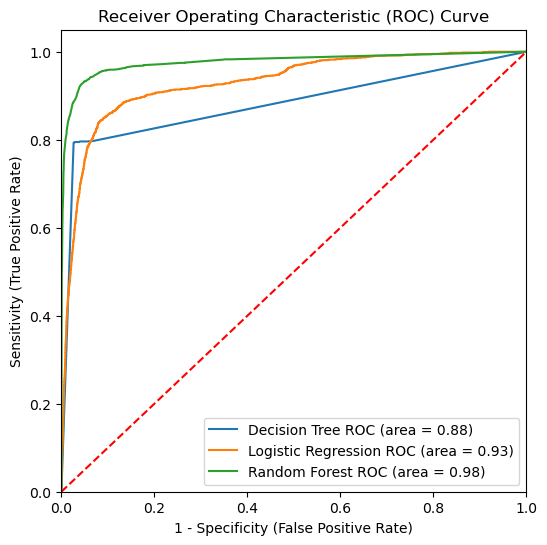

In [194]:
models = [
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=0),
    },
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(solver='lbfgs', max_iter=500),
    },
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    }
]

# Initialize the plot
plt.figure(figsize=(6, 6))

# Iterate through each model in the list
for m in models:
    model = m['model']  # select the model
    model.fit(X_train, y_train)  # train the model
    
    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate AUC (Area Under Curve)
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Add a diagonal line for random chance
plt.plot([0, 1], [0, 1], 'r--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend to the plot
plt.legend(loc="lower right");

### Best classification model

##### a) What is the model accuracy?

- **Decision Tree**: 93%
- **Logistic Regression**: 93%
- **Random Forest**: 97%

##### b) True positive rate? False positive rate?

**True Positive Rate (Recall)**

- **Decision Tree**: 51%
- **Logistic Regression**: 52%
- **Random Forest**: 80%

**False Positive Rate (FPR)**

- **Decision Tree**: 1.2%
- **Logistic Regression**: 2.1%
- **Random Forest**: 1.0%


##### c) What is ROC score?

**AUC (Area Under the Curve)**

- **Decision Tree**: 0.88
- **Logistic Regression**: 0.93
- **Random Forest**: 0.98


## Subsession 2 Regression

In [195]:
df.dtypes

ispremier                int64
age21plus                int64
age18to21                int64
age13to18                int64
gendercode               int64
loyalty_email_offer      int64
reward_email             int64
reward_mobile            int64
reward_sms               int64
theatr_mob_offer       float64
theatr_sms_offer         int64
life_award_amt         float64
life_spend_amt         float64
ol_fee_waive_amt       float64
est_inc_rng              int64
est_home_val_rng         int64
child_pres               int64
freq_theatre             int64
ticket_qty               int64
ticket_bal             float64
concqtysum               int64
concloydisc            float64
conc_bal               float64
unk_inc                  int64
unk_home                 int64
age                      int64
dtype: object

### 1. Drop columns

In [196]:
# Create a working copy of the DataFrame
df_reg = df.copy()

# Define the columns you want to drop
cols_to_drop = ['ticket_qty', 'freq_theatre', 'ispremier']

# Drop the specified columns
df_reg = df_reg.drop(cols_to_drop, axis=1)

# Print the results
print("Columns dropped:", cols_to_drop)
print("Remaining columns:", df_reg.columns.tolist())



Columns dropped: ['ticket_qty', 'freq_theatre', 'ispremier']
Remaining columns: ['age21plus', 'age18to21', 'age13to18', 'gendercode', 'loyalty_email_offer', 'reward_email', 'reward_mobile', 'reward_sms', 'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt', 'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng', 'child_pres', 'ticket_bal', 'concqtysum', 'concloydisc', 'conc_bal', 'unk_inc', 'unk_home', 'age']


### 2. Detect & Remove Abnormal TICKET_BAL Values

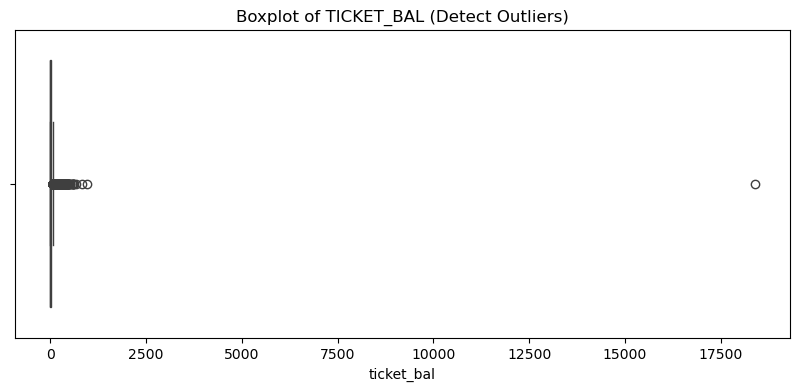

In [197]:
#2. Detect & Remove Abnormal TICKET_BAL Values
plt.figure(figsize=(10,4))
sns.boxplot(x=df_reg['ticket_bal'])
plt.title("Boxplot of TICKET_BAL (Detect Outliers)");

In [198]:
# Calculate IQR to detect outliers
Q1 = df_reg['ticket_bal'].quantile(0.25)  # 25th percentile
Q3 = df_reg['ticket_bal'].quantile(0.995)  # 99.5th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: -347.8967999999954
Upper bound: 579.8279999999922


In [199]:
# Remove rows where 'ticket_bal' is outside of the upper and lower bounds
df_cleaned = df_reg[(df_reg['ticket_bal'] <= upper_bound)]

# Check how many rows were removed
print(f"Original dataset size: {df_reg.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")


Original dataset size: 47169
Cleaned dataset size: 47160


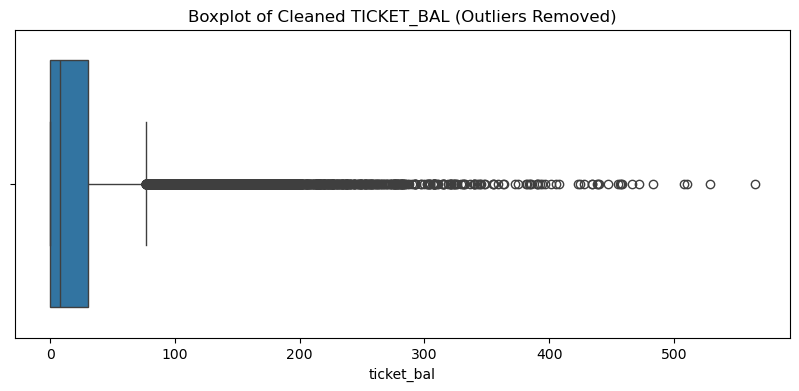

In [200]:
# Create a boxplot again to confirm that the outliers were removed
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['ticket_bal'])
plt.title("Boxplot of Cleaned TICKET_BAL (Outliers Removed)")
plt.show()


### 3. Build Regression Models (Linear / Lasso / RandomForest)

#### a. Linear regression

In [201]:
#assigning columns to X and Y variables

y = df_cleaned['ticket_bal'] 
X = df_cleaned.drop(['ticket_bal'], axis =1)  #a simple way to assign X variables (preferred)

In [202]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33012, 22) (33012,) (14148, 22) (14148,)


In [203]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, explained_variance_score

In [204]:
# build a multiple regression model below ... this is our first regression model ... "full" model since using all variables

line = lm.LinearRegression()

line.fit(X_train, y_train)   

line_predicted = line.predict(X_test)

In [205]:
print("mean square error: ", mean_squared_error(y_test, line_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, line_predicted))

mean square error:  1027.7918393061216
variance or r-squared:  0.27649258196557136


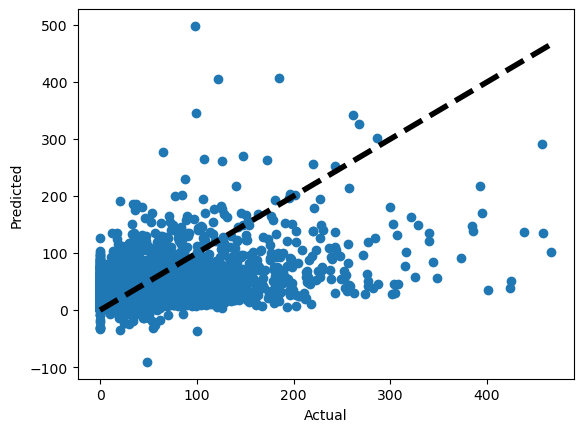

In [206]:
plt.subplots()
plt.scatter(y_test, line_predicted)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### b. Lasso

In [207]:
#assigning columns to X and Y variables

y = df_cleaned['ticket_bal'] 
X = df_cleaned.drop(['ticket_bal'], axis =1)  #a simple way to assign X variables (preferred)

In [208]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33012, 22) (33012,) (14148, 22) (14148,)


In [209]:
# Define numerical and categorical columns

num_cols = df_cleaned.select_dtypes(include=[np.number]).drop(columns=['ticket_bal']).columns
cat_cols = df_cleaned.select_dtypes(include=[object]).columns   

print(num_cols, cat_cols)

# No categorical column
# We already know that there is no missing value

Index(['age21plus', 'age18to21', 'age13to18', 'gendercode',
       'loyalty_email_offer', 'reward_email', 'reward_mobile', 'reward_sms',
       'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'concqtysum', 'concloydisc', 'conc_bal', 'unk_inc',
       'unk_home', 'age'],
      dtype='object') Index([], dtype='object')


In [210]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

In [211]:
# Convert the scaled numerical features back to a DataFrame
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])


X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

In [212]:
#Fit the model
las = lm.Lasso(alpha=1)                     #higher alpha (penality parameter), fewer predictors
las.fit(X_train_num_df, y_train)
las_predicted = las.predict(X_test_num_df)

In [213]:
print("mean square error: ", mean_squared_error(y_test, las_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, las_predicted))

mean square error:  1069.4470584177589
variance or r-squared:  0.24704392630995753


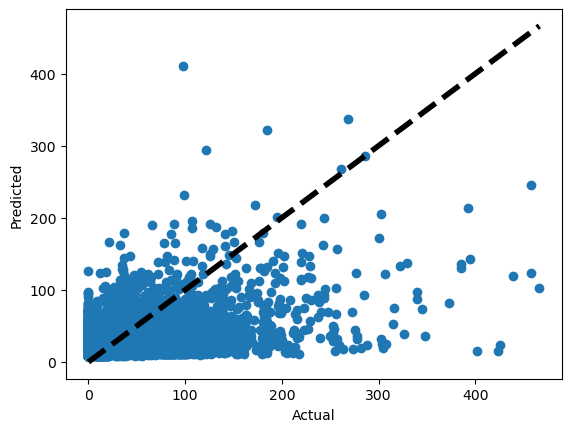

In [214]:
plt.subplots()
plt.scatter(y_test, las_predicted)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### c. RandomForestRegressor

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# model building
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_num_df, y_train)
regr_predicted = regr.predict(X_test_num_df)

print("mean square error: ", mean_squared_error(y_test, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, regr_predicted))

mean square error:  632.5231414441471
variance or r-squared:  0.555699610108731


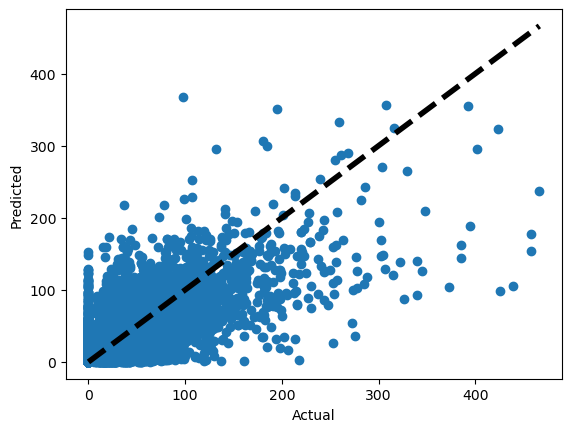

In [216]:
plt.subplots()
plt.scatter(y_test, regr_predicted)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 4. Best model

#### Accuracy

Best Performing Model: **RandomForestRegressor**
- **MSE**: 634.15
- **R²**: 0.5546  
  *RandomForestRegressor* is the best-performing model, with the lowest MSE and the highest R², indicating the strongest predictive power and ability to explain data variance.

Other Models:

- **Linear Regression**  
  - **MSE**: 1027.79  
  - **R²**: 0.2765

- **Lasso Regression**  
  - **MSE**: 1069.45  
  - **R²**: 0.2470


#### Essential variables

In [217]:
# Get feature importances from the Random Forest model
importances = regr.feature_importances_

# Pair feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': importances    # Feature importance values
})

# Sort the features by importance and display the most important ones
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)


                Feature  Importance
11       life_spend_amt        0.50
18             conc_bal        0.11
12     ol_fee_waive_amt        0.10
21                  age        0.08
17          concloydisc        0.05
16           concqtysum        0.04
14     est_home_val_rng        0.03
10       life_award_amt        0.02
3            gendercode        0.02
13          est_inc_rng        0.01
8      theatr_mob_offer        0.01
6         reward_mobile        0.01
15           child_pres        0.01
5          reward_email        0.01
4   loyalty_email_offer        0.01
20             unk_home        0.00
1             age18to21        0.00
19              unk_inc        0.00
0             age21plus        0.00
2             age13to18        0.00
7            reward_sms        0.00
9      theatr_sms_offer        0.00


## Part 2

## Subsession 1 Clustering

### 1. Analyze the data using the K-means algorithm.

#### a. Elbow Method for Optimal K in K-Mean

In [218]:
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,1,0,0,0,0,1,1,0,0,0.00,...,0,0,2,29.58,0,0.00,0.00,0,0,9
1,1,0,0,1,3,1,1,1,0,1.00,...,3,1,20,191.90,0,0.00,0.00,0,0,24
2,1,1,0,0,0,1,1,0,0,0.00,...,1,0,16,192.84,1,-8.49,0.00,0,0,72
3,0,1,0,0,0,0,0,0,0,0.00,...,1,0,0,0.00,1,0.00,0.00,0,0,63
4,1,1,0,0,0,0,0,0,0,0.00,...,3,1,10,101.20,0,0.00,0.00,0,0,60


In [219]:
#normalization
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,0.88,-0.89,-0.06,-0.04,-0.82,0.18,0.14,-0.50,-0.00,-0.51,...,-0.89,-0.34,-0.00,0.00,-0.02,0.01,-0.02,-0.83,-0.79,-0.41
1,0.88,-0.89,-0.06,0.96,0.18,0.18,0.14,0.50,-0.00,0.49,...,0.11,0.66,0.01,0.01,-0.02,0.01,-0.02,-0.83,-0.79,-0.25
2,0.88,0.11,-0.06,-0.04,-0.82,0.18,0.14,-0.50,-0.00,-0.51,...,-0.56,-0.34,0.01,0.01,-0.01,-0.47,-0.02,-0.83,-0.79,0.27
3,-0.12,0.11,-0.06,-0.04,-0.82,-0.82,-0.86,-0.50,-0.00,-0.51,...,-0.56,-0.34,-0.00,-0.00,-0.01,0.01,-0.02,-0.83,-0.79,0.18
4,0.88,0.11,-0.06,-0.04,-0.82,-0.82,-0.86,-0.50,-0.00,-0.51,...,0.11,0.66,0.01,0.00,-0.02,0.01,-0.02,-0.83,-0.79,0.14


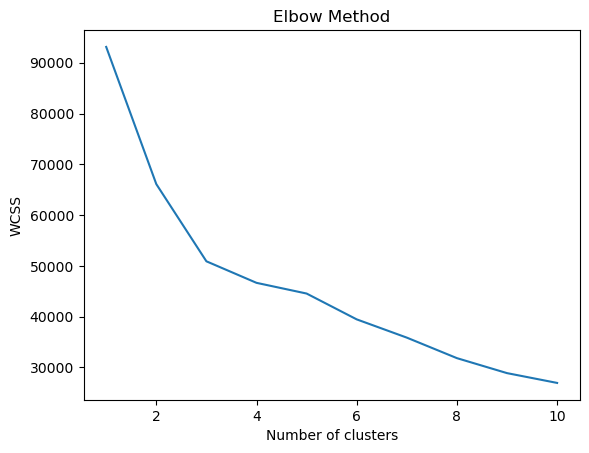

In [220]:
# WCSS: Within cluster sum of squares
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',                     
                    n_init='auto', 
                    random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

# Plotting the results #inflection point is 3
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### b. Use k = 3 for clustering model

In [221]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', 
                 n_init='auto',
                 n_clusters=3, 
                 random_state=0)
k_means

KMeans(n_clusters=3, random_state=0)

In [222]:
k_means.fit(df_norm)

KMeans(n_clusters=3, random_state=0)

In [223]:
# find out cluster centers

k_means.cluster_centers_

array([[-0.03, -0.01, 0.01, -0.00, -0.07, -0.19, -0.14, -0.50, -0.00,
        -0.50, -0.00, -0.00, -0.00, -0.00, -0.11, -0.06, 0.10, 0.03,
        -0.00, -0.00, -0.01, 0.01, -0.01, 0.17, 0.11, -0.02],
       [-0.01, -0.01, 0.00, 0.01, 0.13, 0.17, 0.13, 0.49, -0.00, 0.49,
        -0.00, -0.00, -0.00, 0.00, -0.11, -0.10, 0.10, 0.03, -0.00,
        -0.00, 0.01, 0.00, 0.01, 0.17, 0.19, 0.00],
       [0.09, 0.05, -0.03, -0.02, -0.19, -0.05, -0.05, -0.25, 0.00,
        -0.24, 0.00, 0.02, 0.02, 0.00, 0.57, 0.40, -0.51, -0.13, 0.00,
        0.00, 0.01, -0.01, 0.01, -0.82, -0.75, 0.04]])

In [224]:
# convert cluster lables to dataframe

df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,2
2,2
3,2
4,2


In [225]:
# join df_norm & df1

df2 = df_norm.join(df1)
df2.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age,cluster
0,0.88,-0.89,-0.06,-0.04,-0.82,0.18,0.14,-0.50,-0.00,-0.51,...,-0.34,-0.00,0.00,-0.02,0.01,-0.02,-0.83,-0.79,-0.41,2
1,0.88,-0.89,-0.06,0.96,0.18,0.18,0.14,0.50,-0.00,0.49,...,0.66,0.01,0.01,-0.02,0.01,-0.02,-0.83,-0.79,-0.25,2
2,0.88,0.11,-0.06,-0.04,-0.82,0.18,0.14,-0.50,-0.00,-0.51,...,-0.34,0.01,0.01,-0.01,-0.47,-0.02,-0.83,-0.79,0.27,2
3,-0.12,0.11,-0.06,-0.04,-0.82,-0.82,-0.86,-0.50,-0.00,-0.51,...,-0.34,-0.00,-0.00,-0.01,0.01,-0.02,-0.83,-0.79,0.18,2
4,0.88,0.11,-0.06,-0.04,-0.82,-0.82,-0.86,-0.50,-0.00,-0.51,...,0.66,0.01,0.00,-0.02,0.01,-0.02,-0.83,-0.79,0.14,2


### 2.

#### a. Building and Visualizing a Simple Decision Tree Using Cluster Analysis Results

In [226]:
y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)
X.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,0.88,-0.89,-0.06,-0.04,-0.82,0.18,0.14,-0.50,-0.00,-0.51,...,-0.89,-0.34,-0.00,0.00,-0.02,0.01,-0.02,-0.83,-0.79,-0.41
1,0.88,-0.89,-0.06,0.96,0.18,0.18,0.14,0.50,-0.00,0.49,...,0.11,0.66,0.01,0.01,-0.02,0.01,-0.02,-0.83,-0.79,-0.25
2,0.88,0.11,-0.06,-0.04,-0.82,0.18,0.14,-0.50,-0.00,-0.51,...,-0.56,-0.34,0.01,0.01,-0.01,-0.47,-0.02,-0.83,-0.79,0.27
3,-0.12,0.11,-0.06,-0.04,-0.82,-0.82,-0.86,-0.50,-0.00,-0.51,...,-0.56,-0.34,-0.00,-0.00,-0.01,0.01,-0.02,-0.83,-0.79,0.18
4,0.88,0.11,-0.06,-0.04,-0.82,-0.82,-0.86,-0.50,-0.00,-0.51,...,0.11,0.66,0.01,0.00,-0.02,0.01,-0.02,-0.83,-0.79,0.14


In [227]:
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.05)

model = model.fit(X, y)    # without model validation since this model is not for prediction, but for explanation


##### i) Visualize the decision tree

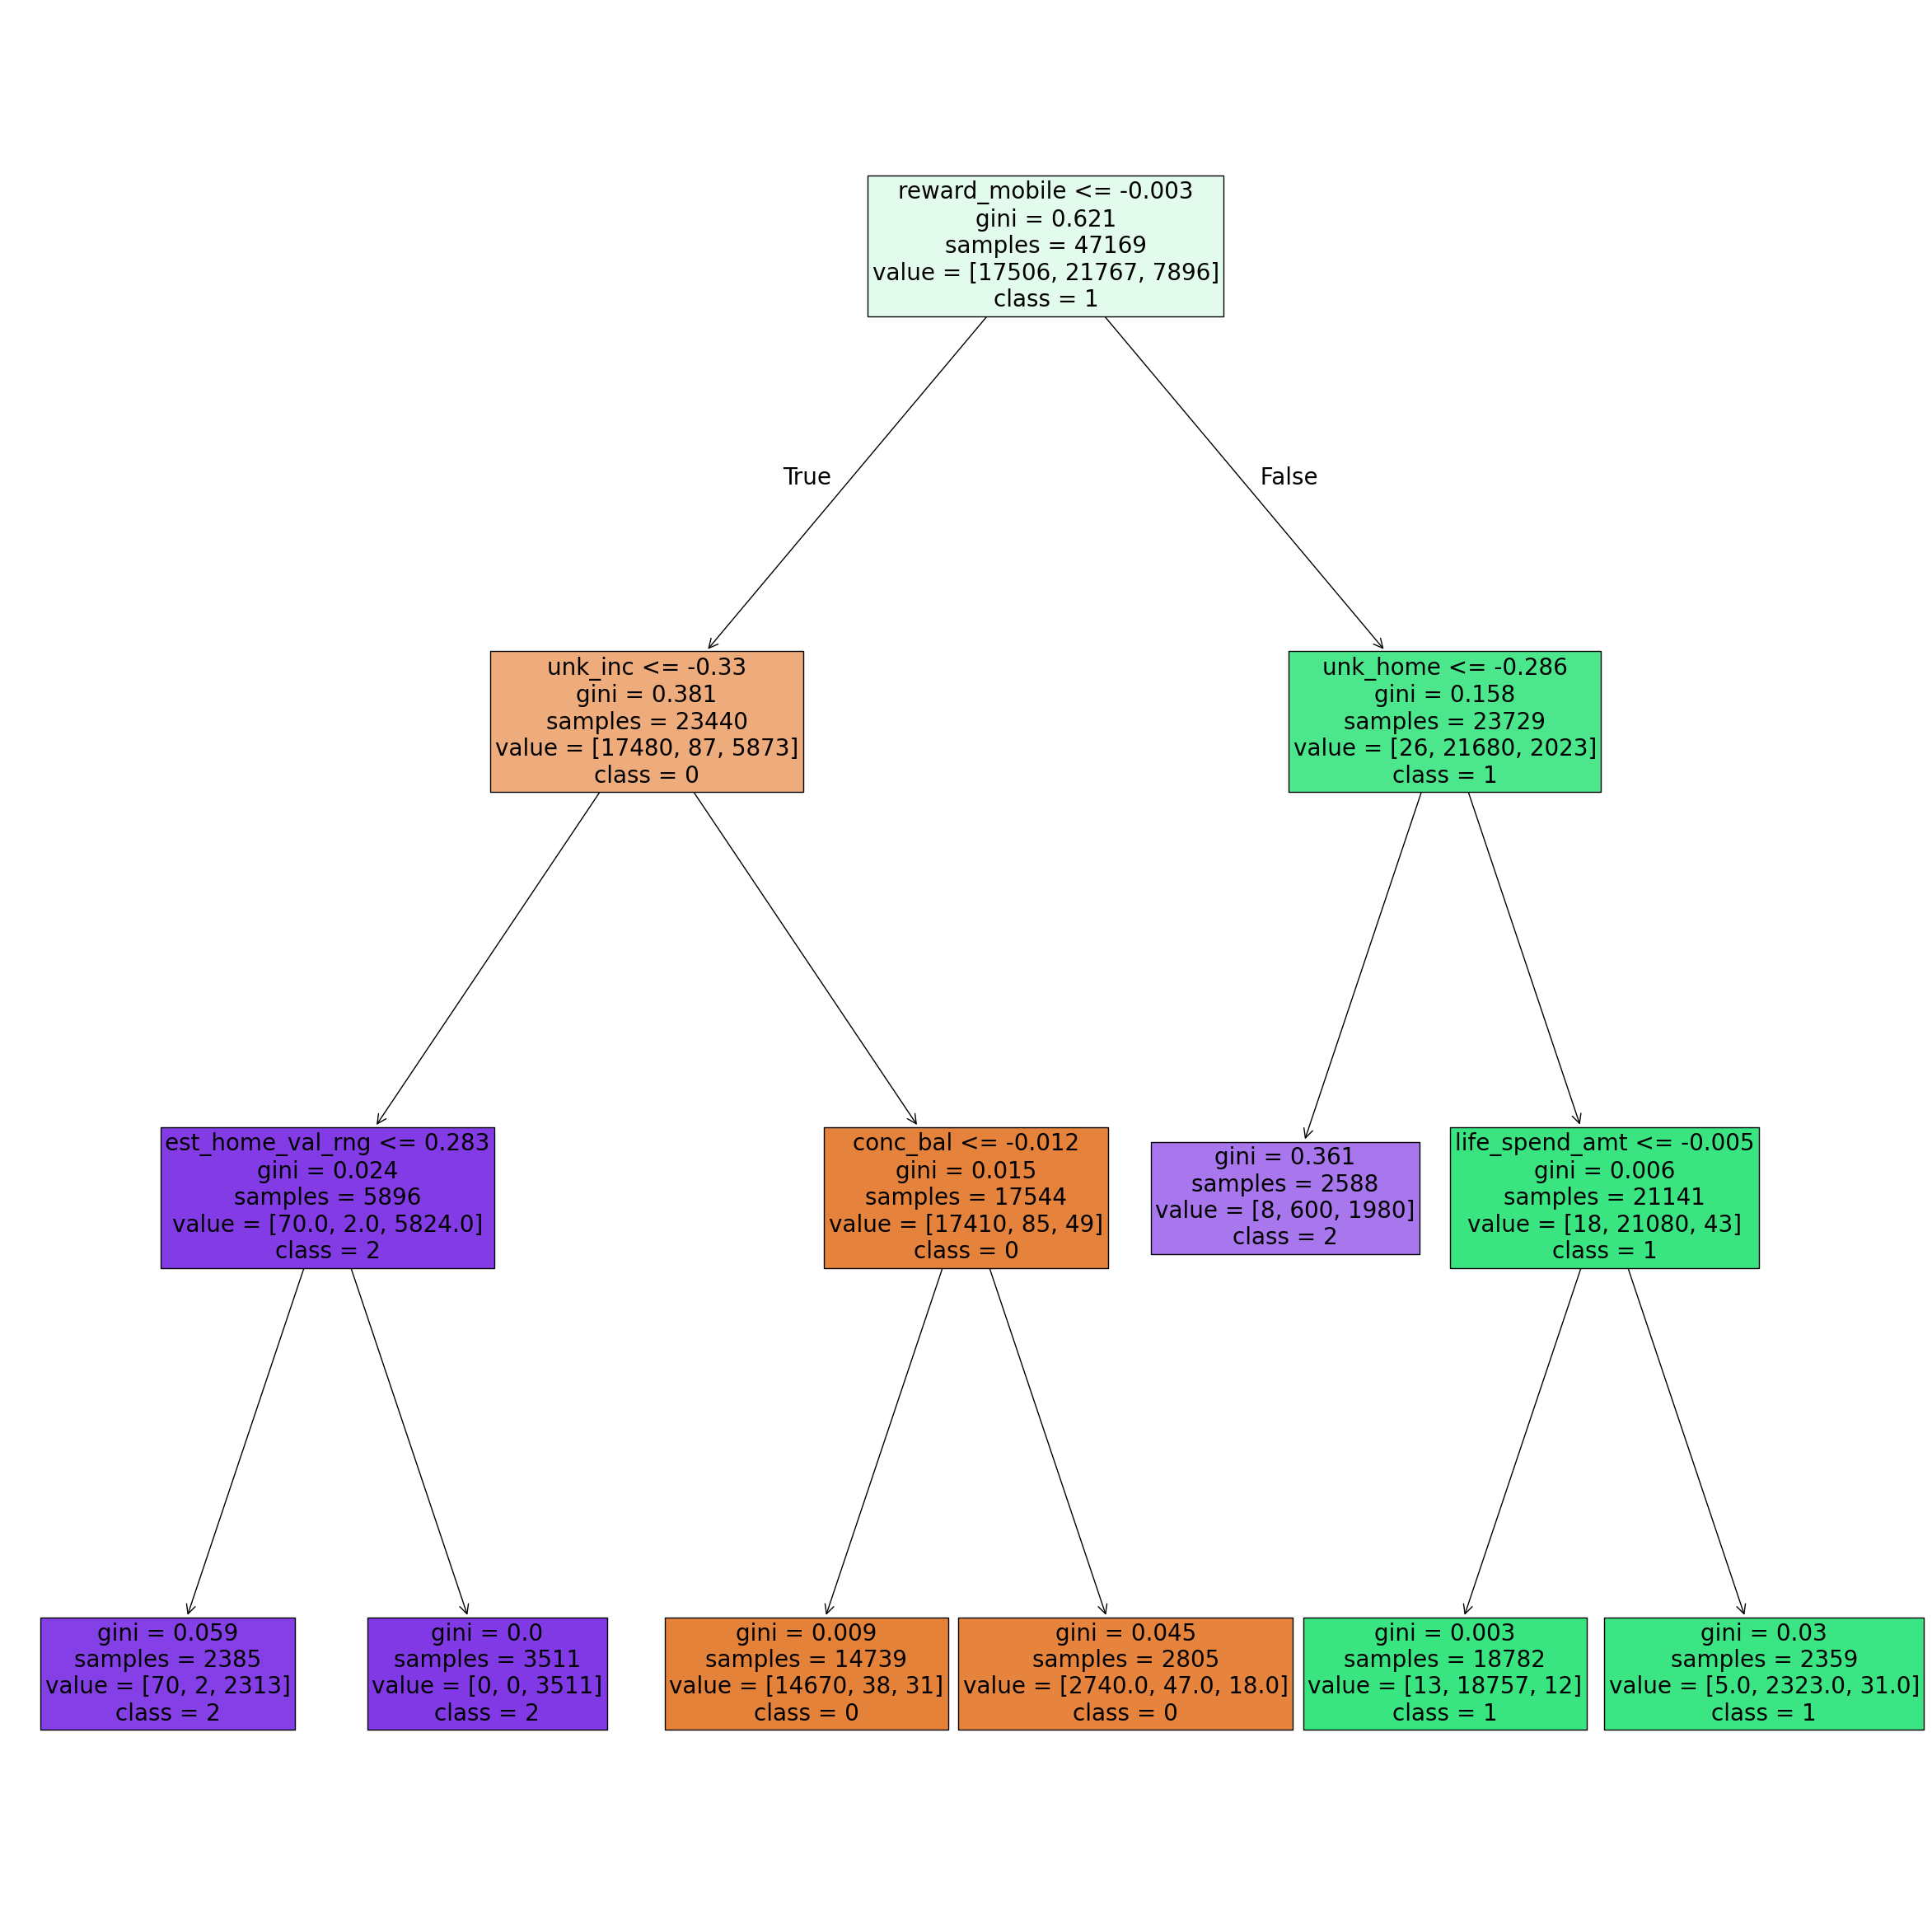

In [228]:
plt.figure(figsize=(30,30))
tree.plot_tree(model,
               feature_names = X.columns.tolist(), 
               class_names=['0','1','2'],
               fontsize=20,
               filled = True);

##### ii) Report the model accuracy

In [229]:
# check the accuracy on the training set
model.score(X, y)

0.9814496809345121

#### b. Developing Customer Profiles for Each Cluster

In [230]:
df2.groupby('cluster').mean()

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,...,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.03,-0.01,0.01,-0.00,-0.07,-0.19,-0.14,-0.50,-0.00,-0.50,...,0.10,0.03,-0.00,-0.00,-0.01,0.01,-0.01,0.17,0.11,-0.02
1,-0.01,-0.01,0.00,0.01,0.13,0.17,0.13,0.49,-0.00,0.49,...,0.10,0.03,-0.00,-0.00,0.01,0.00,0.01,0.17,0.19,0.00
2,0.09,0.05,-0.03,-0.02,-0.19,-0.05,-0.05,-0.25,0.00,-0.24,...,-0.51,-0.13,0.00,0.00,0.01,-0.01,0.01,-0.82,-0.75,0.04


**Cluster 0:**
- "Younger customers with low engagement in loyalty programs and promotions, and low overall spending."
- "They attend the theatre less and spend less overall. Additionally, they show lower participation in offers and discounts."

**Cluster 1:**
- "Older, more engaged customers who actively participate in loyalty programs, promotions, and likely have higher income and home value."
- "They visit the theatre more often, have higher spending, and are more likely to opt into offers like reward emails and loyalty emails."

**Cluster 2:**
- "A younger or more diverse age group with low engagement in loyalty programs and offers."
- "They attend the theatre less, have low spending, and show lower participation in rewards and discounts."

## Subsession 2 Dimensionality reduction

### a. Classification Model: Predicting ISPREMIER

In [231]:
df.dtypes

ispremier                int64
age21plus                int64
age18to21                int64
age13to18                int64
gendercode               int64
loyalty_email_offer      int64
reward_email             int64
reward_mobile            int64
reward_sms               int64
theatr_mob_offer       float64
theatr_sms_offer         int64
life_award_amt         float64
life_spend_amt         float64
ol_fee_waive_amt       float64
est_inc_rng              int64
est_home_val_rng         int64
child_pres               int64
freq_theatre             int64
ticket_qty               int64
ticket_bal             float64
concqtysum               int64
concloydisc            float64
conc_bal               float64
unk_inc                  int64
unk_home                 int64
age                      int64
dtype: object

In [232]:
# declare X variables and y variable

y = df['ispremier']
X = df.drop(['ispremier'], axis=1)

In [233]:
# split validation (70% training & 30% testing data, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33018, 25) (33018,) (14151, 25) (14151,)


In [234]:
# standardizing X features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [235]:
# initialize LinearRegression()
model1 = lm.LinearRegression()

# fit function
model1.fit(X_train, y_train)  

LinearRegression()

In [236]:
# evaluation

print("mean square error: ", mean_squared_error(y_test, model1.predict(X_test)))
print("variance or r-squared: ", explained_variance_score(y_test, model1.predict(X_test)))

mean square error:  0.1696819572595944
variance or r-squared:  -0.6755298156208074


In [237]:
# Standardize X_train and X_test
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### PCA

In [238]:
# Apply PCA on Training Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit_transform X_train_scaled 
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform X_test_scaled
X_test_pca = pca.transform(X_test_scaled)

In [239]:
model2 = lm.LinearRegression()
model2.fit(X_train_pca, y_train)

LinearRegression()

In [240]:
# Apply PCA on Training Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2 components

# fit_transform X_train_scaled
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform X_test_scaled
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca)

[[-1.75 -2.28]
 [-2.90 -2.60]
 [1.42 -0.71]
 ...
 [0.54 0.44]
 [0.61 -1.61]
 [-5.31 8.54]]


In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train_pca, y_train)  # X_train_pca is the training data after dimensionality reduction

# Predict on the test set
y_pred_class = logreg_model.predict(X_test_pca)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_class))

# Display the classification report, including precision, recall, and other metrics
print('Classification Report:')
print(classification_report(y_test, y_pred_class))


Accuracy: 0.9001483994064023
Confusion Matrix:
[[12339   194]
 [ 1219   399]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12533
           1       0.67      0.25      0.36      1618

    accuracy                           0.90     14151
   macro avg       0.79      0.62      0.65     14151
weighted avg       0.88      0.90      0.88     14151



### b. Regression model: Predicting TICKET_BAL

In [242]:
# declare X variables and y variable

y = df['ticket_bal']
X = df.drop(['ticket_bal'], axis=1)

In [243]:
# split validation (70% training & 30% testing data, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33018, 25) (33018,) (14151, 25) (14151,)


In [244]:
# standardizing X features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
# Standardize X_train and X_test
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [246]:
# Apply PCA on Training Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit_transform X_train_scaled 
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform X_test_scaled
X_test_pca = pca.transform(X_test_scaled)

In [247]:
model3 = lm.LinearRegression()
model3.fit(X_train_pca, y_train)

LinearRegression()

In [248]:
# Apply PCA on Training Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2 components

# fit_transform X_train_scaled
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform X_test_scaled
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca)

[[-1.95 -2.00]
 [-3.14 -2.20]
 [1.56 -1.09]
 ...
 [0.71 0.13]
 [0.72 -2.05]
 [-4.37 7.95]]


In [249]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
reg_model = LinearRegression()

# Train the regression model
reg_model.fit(X_train_pca, y_train)  

# Predict on the test set
y_pred_reg = reg_model.predict(X_test_pca)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate the R2 score (model's goodness of fit)
r2 = r2_score(y_test, y_pred_reg)
print(f'R2 Score: {r2}')


Mean Squared Error (MSE): 13866.7748958406
R2 Score: 0.45352375199184436


### c. Compare Model Performance: Original Features vs PCA (Section 2, Part 1)

#### Predicting ISPREMIER

Comparison of Performance with and without PCA

**Part 1 (Original Features, No PCA)**

- **Accuracy**: 92.61%
- **Confusion Matrix**:  
[[12272   261]   
 [  784   834]]

- **Classification Report**:
- **Class 0 (Insider)**: Precision = 0.94, Recall = 0.98, F1-score = 0.96
- **Class 1 (Premier)**: Precision = 0.76, Recall = 0.52, F1-score = 0.61
- **ROC AUC**: 0.747

**Part 2 (PCA Applied)**

- **Accuracy**: 90.01%
- **Confusion Matrix**:  
[[12339 194]  
[ 1219 399]]

- **Classification Report**:
- **Class 0 (Insider)**: Precision = 0.91, Recall = 0.98, F1-score = 0.95
- **Class 1 (Premier)**: Precision = 0.67, Recall = 0.25, F1-score = 0.36
- **ROC AUC**: 0.747

---

**Summary**

- **Without PCA**: The model performs well for both classes, with good precision and recall for **Class 1 (Premier)**.
- **With PCA**: Accuracy drops by about 3%. **Class 1 (Premier)**'s recall significantly drops (0.52 → 0.25), indicating PCA may have lost important features for predicting this minority class.
- **Conclusion**: If predicting the minority class (e.g., `Premier`) is important, using **PCA** may hurt performance. However, if computation efficiency is a priority, PCA can be useful.


#### Predicting TICKET_BAL

Comparison of Performance with and without PCA (Linear Regression)

**Part 1 (Original Features, No PCA)**

- **Mean Squared Error (MSE)**: 1027.79
- **R-squared (Variance Explained)**: 0.2765

---

**Part 2 (PCA Applied)**

- **Mean Squared Error (MSE)**: 13866.60
- **R-squared (Variance Explained)**: 0.4535

---

**Summary**

- **Without PCA**: The model has a relatively low R-squared value (0.2765), indicating that only about 27.65% of the variance in the target variable is explained by the features. The MSE is also lower, suggesting better performance with the original features.
  
- **With PCA**: Applying PCA significantly increases the R-squared value to 0.4535, meaning about 45.35% of the variance in the target variable is explained. However, the MSE increases dramatically, which could suggest that the dimensionality reduction (PCA) might have discarded some important information for regression tasks.

- **Conclusion**: Although PCA improves the R-squared (explained variance), it leads to a much higher MSE, which indicates a poorer fit. Depending on the goal (better explanatory power vs. a lower error), you may choose to use either the original features or PCA.


## Subsection 3. Storytelling

**1. Who are the customers likely to convert to Premier?**

🔍 Key Patterns We Found

- **Customers who buy more tickets are the strongest conversion candidates.**  
  `ticket_qty` and `ticket_bal` both show clear positive relationships with Premier conversion.  
  These customers already engage with the brand frequently.

- **High lifetime spending = high chance to upgrade.**  
  Metrics like `life_spend_amt` and `life_award_amt` are strong indicators that a customer cares about rewards and benefits.

- **Higher-income customers tend to upgrade more often.**  
  `est_inc_rng` and `est_home_val_rng` both show that stronger financial capability increases the likelihood of going Premier.

- **More responsive to marketing**  
  Customers who opt in for mobile/email rewards are noticeably more likely to convert.  
  These are people who pay attention to promotions.

---

🧠 What the Models Say

- **Logistic Regression** and **Decision Tree** both highlight the same thing:  
  high spending + high ticket usage are the top predictors.

- **Decision Tree Insights:**  
  - If `concloydisc ≤ -0.10`, the customer is much more likely to be Premier.  
  - If `ticket_bal ≤ 43.61`, the customer is almost never Premier.

**Bottom line:**  
People who spend more, use more tickets, and engage more with rewards are the ones most likely to convert to Premier.

---

**2. Who are the customers that utilize Premier?**

🔍 What Premier Users Look Like

- **They buy a lot more tickets.**  
  Premier avg `ticket_qty`: **7.32**  
  Non-Premier: **1.66**

- **They maintain higher ticket balances.**  
  Premier avg `ticket_bal`: **75.54**  
  Non-Premier: **16.50**

- **They are extremely high-value customers.**  
  They spend more over their lifetime and earn more reward points.  
  These customers generate a significant portion of total revenue.

- **They also have higher financial capability.**  
  For example, `conc_bal` is over three times higher for Premier users.

---

🧠 Model Takeaways

Even though the Premier class is imbalanced, the model still shows consistent patterns:  
**ticket usage and lifetime spending dominate as the strongest predictors.**

**Bottom line:**  
Premier users are high-engagement, high-spending, loyal customers with stronger financial capacity.

---

## 💡 Key Business Insights & Strategic Recommendations

🔍 Profile of Insider Users

- **They participate less in rewards and email/mobile programs.**  
  They aren’t as responsive to promotions.

- **They tend to be older.**  
  Insider avg age: **49.5**  
  Premier avg age: **46.47**

- **Lower income and asset levels.**  
  Indicators like `conc_bal` and `concloydisc` show that they generally have weaker financial capacity.

- **Lower ticket usage overall.**  
  They buy fewer tickets and keep lower ticket balances.  
  This suggests they are more “casual” users.
